# **DTSA5510 Unsupervised Algorithms in Machine Learning**
## Final Project
---


## 1 - Project Description and Objective

The Food and Drug Administration (FDA) in the United States maintains a comprehensive dataset of product recalls that can be caused by a variety of reasons, ranging from minor issues like mislabeling to major problems like contamination with harmful pathogens that can cause food poisoning. One of the features of this database is a textual description of the recall issue, which can be used to explore the possibility of applying unsupervised machine learning models to classify recalls based on their severity.

Since this is an unsupervised machine learning project, the dataset doesn't have any predefined labels for classification. However, to evaluate the accuracy of the model, a new column has been added to the dataset that manually tagged the training data with three possible categories - "Moderate," "Major," and "Severe" - based on the severity of the recall issue. This labeled data will be used to evaluate the accuracy of the model and ensure that the unsupervised learning algorithm is performing well. This is a similar approach to the exercises we've done in class.

In summary, the objective of this project is to use an **unsupervised machine learning** algorithm to cluster data and create meaningful groupings without predefined labels. The ultimate goal is to group the recall data based on the severity of the underlying issue, which in turn can be used to identify patterns and trends in the recall data and take preventive measures to avoid future recalls.


## 2 - Exploratory Data Analysis (EDA)

The first step of this project is to perform Exploratory Data Analysis (EDA). This is a crucial step in the machine learning process that involves understanding and visualizing the data at hand to identify patterns, relationships, and potential issues that may affect the performance of the machine learning model. EDA involves techniques such as data visualization, statistical analysis, and data cleaning to examine the characteristics of the data, including its distribution, range, and missing values. 

By performing EDA, machine learning practitioners can gain insights into the quality and integrity of the data, select relevant features, and determine which machine learning algorithms are best suited for the given task. EDA is a key component in ensuring the accuracy, robustness, and generalizability of machine learning models, and helps to minimize the risk of bias or errors that may arise from working with incomplete, biased, or noisy data.

### 2.1 - Data Source

The dataset has been extracted as a CSV file using Google's BigQuery Public Dataset and manually tagged with labels for evaluation. The data is provided by the US Food and Drug Administration and contains 23,400 observations (rows).

https://cloud.google.com/bigquery/public-data <br>
https://www.fda.gov/

**Attributes**

| Column Name         | Description                                 | Pandas Data Type |
|:--------------------|:--------------------------------------------|:----------------:|
| reason_for_recall | Information describing how the product is defective and additional details. | object (string) |
| classification | Label identifying the severity of the product defect, classified in "Moderate", "Major" and "Severe" | object (string) |


> **Note**: As explained in the project description, this is an **unsupervised machine learning** project. Labels have been added simply to evaluate the accuracy of the model and to subsequently compare with supervised machine learning alternatives.

### 2.2 - Data Inspection

Before proceeding with any machine learning tasks, it is crucial to perform data inspection to ensure that the data is of high quality and is suitable for the task at hand. In this section, I will carry out some basic data inspection and determine the next steps for data cleaning, if necessary.

The first step in data inspection is to examine the general characteristics of the dataset, such as the number of observations, the distribution of the features, and the presence of missing or erroneous data. I will also examine the descriptive statistics of each feature, including the mean, median, and standard deviation, to identify any outliers or anomalies that may affect the performance of the machine learning model.

In [1]:
import numpy as np
import pandas as pd
import time

# Dataset to be used for train and test split
data_raw_df = pd.read_csv('data/fda.csv')

In [2]:
# Total number of classes to be used in the project: "Moderate", "Major" and "Severe"
n_classes = 3

# Number of principal components to be used in PCA
n_pc = 2

In [3]:
# Visualiazation of raw data
data_raw_df.sample(10)

,reason_for_recall,classification
9604,The recalled products are potentially contamin...,severe
18042,Cumin and cumin containing spice mixes may con...,moderate
19487,Customer notified firm of a metal filament fou...,moderate
17680,The firm was notified that the product may con...,moderate
16231,Protein powders and nutritional supplement pro...,major
21689,Reese's Peanut Butter Husky ice cream is being...,major
5256,Prosperity Resources is recalling Sun Kee Mixe...,moderate
5816,Navy Beans with the can code MDSB S1GTD best b...,major
12986,"Undeclared allergens of egg, milk, and wheat",moderate
18897,Hummingbird Brand Organic Chocolate Hazelnut B...,major


### 2.3 - Data Format

The overall data format used in this project consists of two input features, namely reason_for_recall and classification. The reason_for_recall feature contains the information describing how the product is defective and additional details, while classification is the label identifying the severity of the product defect, classified in "Moderate", "Major" and "Severe". Altough this project involves an unsupervised machine learning task, labels have been added simply to evaluate the accuracy of the model and to subsequently compare with supervised machine learning alternatives.

In terms of the size of the dataset, the data contains 23,400 observations, which will be later split into train and test datasets. The training dataset is used to train the machine learning model on the labeled data, allowing it to learn the patterns and relationships between the input features and the output variable. The test dataset is used to evaluate the performance of the trained model on new, unseen data.  

In [4]:
# Confirming shape of the dataset
pd.DataFrame([[data_raw_df.shape[1], data_raw_df.shape[0]]], 
             columns=['Features', 'Observations'], 
             index=['Dataset'])

,Features,Observations
Dataset,2,23400


In [5]:
# Randomizes the data to eliminate any potential bias in case the data was collected in groups
data_raw_df = data_raw_df.copy().sample(data_raw_df.shape[0], random_state=0)
data_raw_df = data_raw_df.reset_index(drop=True)

In [6]:
print('Data Format\n')
data_raw_df.info()

Data Format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23400 entries, 0 to 23399
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reason_for_recall  23400 non-null  object
 1   classification     23400 non-null  object
dtypes: object(2)
memory usage: 365.8+ KB


In [7]:
feature_list = ['reason_for_recall']
text_col = 'reason_for_recall'
label_name = 'classification'

### 2.4 - Data Distribution

Before analyzing the data, it is important to investigate how it is distributed among different categories. This step enables me to determine the balance of the data and foresee any potential issues that may arise due to skewed data during the classification process. By examining the distribution of the data, I can take preventive measures to avoid problems during the analysis.

Upon inspecting the data, it appears that it is well-distributed among three categories, with each group accounting for approximately one-third of the total dataset. This indicates that there is no significant imbalance in the data, which can cause problems during classification, such as overfitting or underfitting.

Later in the EDA section I will plot a histogram during the exploratory data analysis (EDA) section. The histogram will enable me to visualize the frequency distribution of the data and identify any potential patterns or anomalies. This will help me to make informed decisions regarding data preprocessing and feature selection, which will ultimately improve the accuracy and reliability of the classification model.

In [8]:
pd.DataFrame(data_raw_df[label_name].value_counts().sort_values(ascending=False)).head(20)

,classification
major,8123
moderate,8006
severe,7271


### 2.5 - Evaluating for Missing Data

Upon examining the dataset, I found that it does not contain any null or missing data points. Handling missing data can be a time-consuming and challenging task that requires careful consideration of the data and the context in which it is being used. Without null data, I can avoid any potential issues that may arise from handling missing data, such as imputation or deletion of data points. This also means that I can proceed with my analysis and modeling tasks without having to worry about how to handle missing values, which can be a significant advantage in terms of efficiency and accuracy.

In [9]:
pd.DataFrame({'Number of Nulls': data_raw_df.isnull().sum()})

,Number of Nulls
reason_for_recall,0
classification,0


### 2.6 - Data Visualization
Visualizations are an important tool for data exploration and analysis, as they allow us to better understand the characteristics and patterns of the data. In this section, I provide histograms and several other types of visualizations to help us gain insights into the data.

#### Number of Observations per Category

The distribution of data across different categories is an important factor to consider when developing a machine learning model. In this dataset, the number of observations per category seems to be well-distributed, with no significant skewness or imbalances.

Upon examining the data, it was observed that the categories "major" have a slightly higher count than the rest of the categories, but the difference is not significant enough to cause any major data distribution problems. This suggests that the data is representative of the real-world distribution and is suitable for training a machine learning model.

It is important to ensure that the data is representative of the real-world distribution, as models trained on imbalanced data can produce biased results. For example, if the model is trained on a dataset that has a significantly higher number of observations from one category, it may perform well on that category but poorly on others. This can result in the model making incorrect predictions and can have negative consequences in real-world applications.

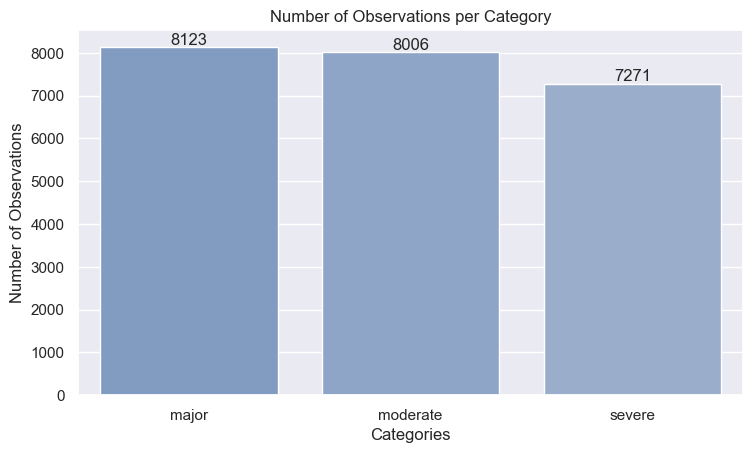

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary of categories
df_sum = pd.DataFrame(data_raw_df[label_name].value_counts())

# Initialize figure
sns.set(rc={'figure.figsize':(8, 5)})
ax = plt.axes()

# Plot chart
sns.set_theme()
sns.set_style('darkgrid')
ax = sns.barplot(data=df_sum, x=df_sum.index, y=label_name,
                 palette=sns.light_palette(color='#79C', reverse=True, n_colors=10))

# Display counts on top of each bar
ax = sns.countplot(x=df_sum.index)
ax.bar_label(ax.containers[0])

# Set Properties
ax.set(title='Number of Observations per Category')
ax.set(xlabel='Categories', ylabel='Number of Observations')
plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

#### Histogram of Words and Characters

Histograms are a common type of visualization used to display the distribution of a single variable. They are particularly useful for identifying patterns and outliers in the data. By examining the shape of the histogram, we can gain insight into the central tendency, variability, and skewness of the variable. This information can be used to inform our data cleaning and feature selection process, and to identify potential issues or anomalies in the data.

In order to gain a better understanding of the distribution of text sizes, I generated several histograms for the dataset. The first three histograms indicate a tendency for the distribution of text sizes to be right-skewed, meaning that the majority of observations tend to be smaller, while a smaller number of observations are larger.

In a right-skewed histogram, the mean, median, and mode are all different. The mode, which represents the value that occurs most frequently in the dataset, is the highest point on the histogram. In this case, the mode corresponds to the most common text size. However, the median and mean, which represent the middle and average values in the dataset respectively, fall to the right of the mode (or, visually, to the right of the peak).

This skewness in the text size distribution is consistent with what we might expect to see in real-world news descriptions. Large descriptions, which may contain in-depth reporting or recalls, are the exception rather than the norm. Most descriptions tend to be shorter in length, providing a summary of the issues that caused the recall.

In [11]:
from textblob import TextBlob

# Extract polarity and sentiment from the text
def calc_sentiment(text, metric):
    blob = TextBlob(str(text.encode('utf-8')))
    
    if metric == 'polarity':
        sentiment = blob.sentiment[0]
    elif metric == 'subjectivity':
        sentiment = blob.sentiment[1]
    else:
        sentiment = 0
        
    return sentiment

# Word and characters count
chart_df = data_raw_df.copy()

# Word and characters count
chart_df['Words'] = chart_df[text_col].apply(lambda row: len(row.split()))
chart_df['Chars'] = chart_df[text_col].apply(lambda x: len(x))

# Text Length
chart_df['Length'] = chart_df[text_col].apply(len)

# Polarity and subjectivity
chart_df['Polarity'] = \
    chart_df.apply(lambda x: calc_sentiment(x[text_col], 'polarity'), axis=1)
chart_df['Subjectivity'] = \
    chart_df.apply(lambda x: calc_sentiment(x[text_col], 'subjectivity'), axis=1)

chart_df.describe()

,Words,Chars,Length,Polarity,Subjectivity
count,23400.000000,23400.000000,23400.000000,23400.000000,23400.000000
mean,17.859658,119.966453,119.966453,-0.013968,0.380003
std,14.022418,88.802420,88.802420,0.123060,0.340601
min,1.000000,4.000000,4.000000,-0.800000,0.000000
25%,7.000000,56.000000,56.000000,-0.062500,0.000000
50%,15.000000,101.000000,101.000000,0.000000,0.386039
75%,24.000000,153.000000,153.000000,0.000000,0.600000
max,171.000000,1136.000000,1136.000000,1.000000,1.000000


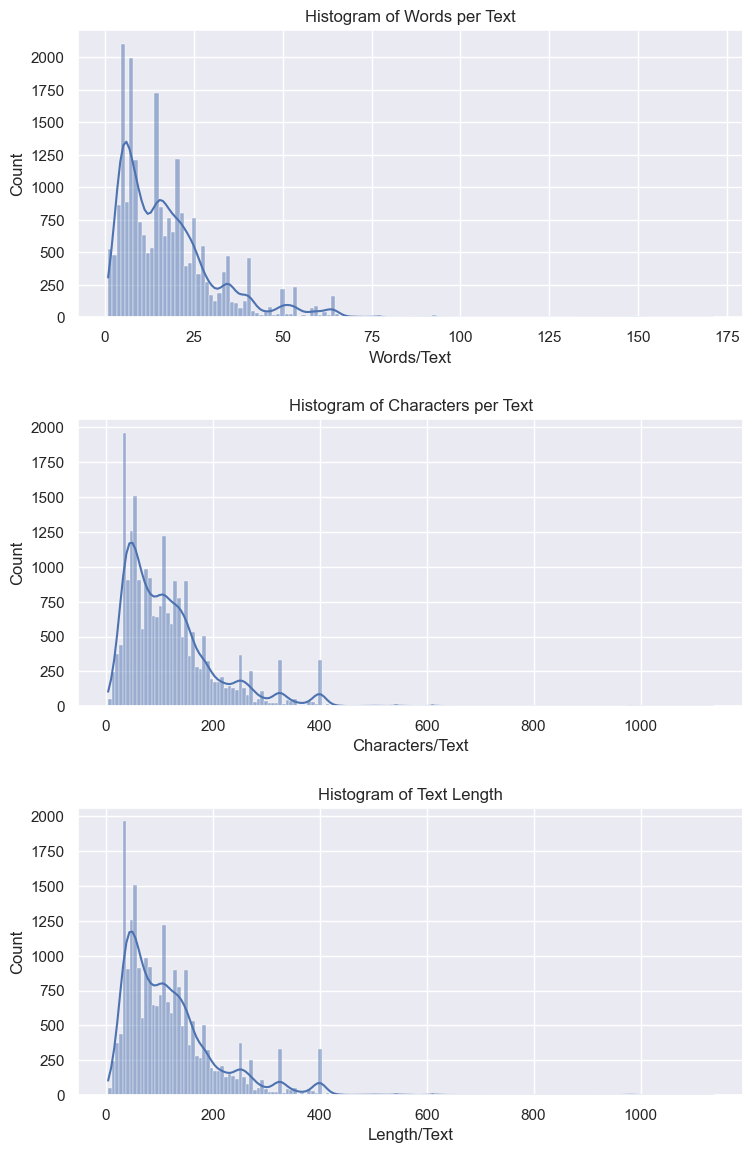

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot charts
axs[0] = sns.histplot(chart_df, x='Words', kde=True, ax=axs[0])
axs[0].set(title='Histogram of Words per Text')
axs[0].set(xlabel='Words/Text', ylabel='Count')

axs[1] = sns.histplot(chart_df, x='Chars', kde=True, ax=axs[1])
axs[1].set(title='Histogram of Characters per Text')
axs[1].set(xlabel='Characters/Text', ylabel='Count')

axs[2] = sns.histplot(chart_df, x='Length', kde=True, ax=axs[2])
axs[2].set(title='Histogram of Text Length')
axs[2].set(xlabel='Length/Text', ylabel='Count')

plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

#### Histograms of Text Polarity and Subjectivity

A histogram of text polarity and subjectivity is a graphical representation of the distribution of sentiment analysis scores for a given text corpus. In sentiment analysis, polarity refers to the degree of positivity or negativity of a text, while subjectivity refers to the degree to which the text expresses opinions or emotions, as opposed to factual information.

A histogram of text polarity and subjectivity can be useful in analyzing the emotional and subjective content of a text corpus. By examining the distribution of polarity and subjectivity scores, we can gain insights into the overall tone and style of the text, as well as identify any trends or patterns in the data. This information can be used to inform machine learning models for sentiment analysis or other natural language processing tasks, and can help to improve the accuracy and effectiveness of these models.

In my case, the histogram of text polarity clearly shows a tendency towards a 0. This observation aligns with the type of description expected for product recalls. In a product recall, the text is typically a summary of the reason for recalling a given product. Therefore, it is essential that the text be objective and informative, without any overtly positive or negative expressions. Instead, the text should focus on elaborating on the issue at hand, providing consumers with a clear understanding of the problem and the steps being taken to address it.

The tendency towards neutral text in the polarity histogram suggests that the data is appropriate for analysis in the context of product recalls. The absence of strong positive or negative sentiments in the text reinforces the notion that the data is objective and informative, making it suitable for further processing and analysis.

The subjectivity rating is a measure of the degree to which the text expresses opinions or emotions. In this case, the subjectivity rating provides insights into the emotional content of the product recall descriptions. About 1/3 of the descriptions have a subjectivity rating of zero, which indicates that they are completely objective and devoid of emotions. These descriptions likely describe moderate issues that do not require strong emotional language.

On the other hand, about 1/6 of the descriptions have a high subjectivity rating, indicating that they carry a high degree of emotions. These descriptions are likely the most serious issues that use extreme words like "very serious" or "life-threatening". These descriptions are likely to elicit strong emotional responses from readers and are of utmost importance in product recalls.

The remaining descriptions fall into a normal distribution, which is expected for most of the descriptions. These descriptions have varying degrees of subjectivity, and they likely describe issues that are neither too serious nor too mild.

The next chart will provide a visual representation of the words used in the categories, which we can use to validate the assertion above. By analyzing the word frequencies and the sentiment associated with them, we can gain deeper insights into the emotional content of the text and verify the accuracy of the subjectivity scores.

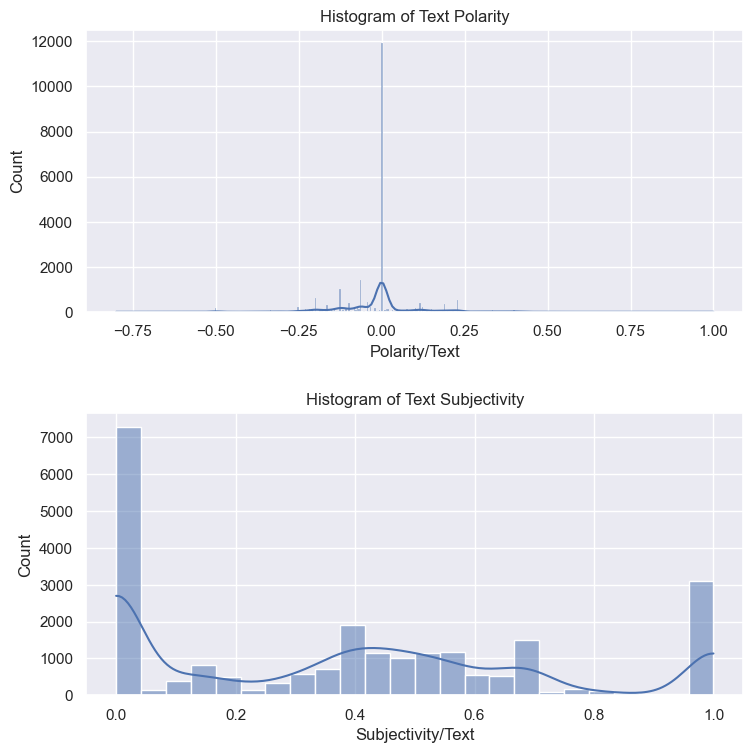

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot charts
axs[0] = sns.histplot(chart_df, x='Polarity', kde=True, ax=axs[0])
axs[0].set(title='Histogram of Text Polarity')
axs[0].set(xlabel='Polarity/Text', ylabel='Count')

axs[1] = sns.histplot(chart_df, x='Subjectivity', kde=True, ax=axs[1])
axs[1].set(title='Histogram of Text Subjectivity')
axs[1].set(xlabel='Subjectivity/Text', ylabel='Count')

plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

#### Wordcloud

A wordcloud is a graphical representation of textual data that displays the most frequently occurring words in a corpus, with the size of each word indicating its relative frequency. The words are arranged in a visually appealing way, often in a random or scattered pattern, with the most frequent words appearing in the largest font size and less frequent words appearing in progressively smaller sizes. Wordclouds can be useful for quickly identifying the most important or frequently used words in a text or corpus, and can help to highlight patterns, themes, or trends that may be present.

For this visualization, I created one chart for each category to allow for a stronger analysis. By looking at the respective charts, we can clearly see that the most used words in each category are consistent with the degree in which the issues can be classified. For example, in the "moderate" category, the most common bigram is "may contain," which indicates that the products listed in this category may have allergens that can cause mild to moderate health issues. This is consistent with the degree of severity associated with this category.

Similarly, in the "severe" category, the most commonly used bigram is "Listeria monocytogenes," a dangerous pathogen that can cause serious food poisoning and even death. The use of words like "contaminated" further reinforces the severity of the issue and is consistent with the classification of this category as severe.

Moreover, the use of words like "may," "potential," and "undeclared" in the respective categories also aligns with the text polarity and subjectivity illustrated previously. These words indicate uncertainty and lack of information, which is consistent with the objective and informative nature of the product recall descriptions.

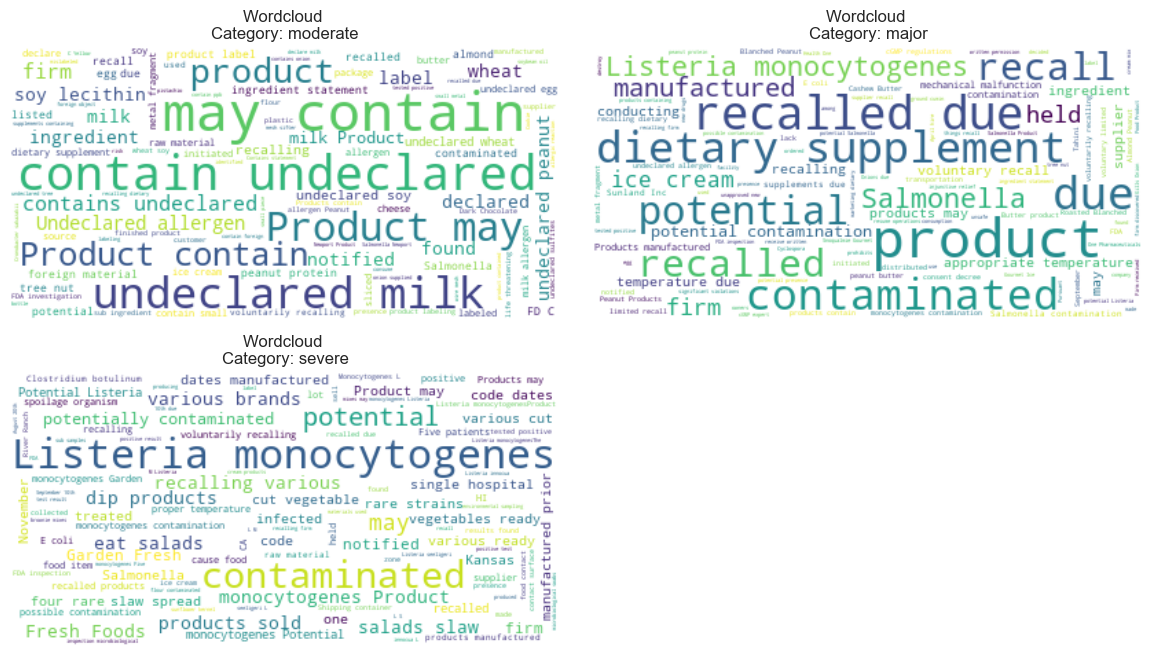

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Create word list for each category
# label_list = list(chart_df[label_name].unique())
label_list = ['moderate', 'major', 'severe']
text_list = []
word_list = []

for label in label_list:
    text_list.append(list(chart_df[text_col][chart_df[label_name] == label]))
    word_list.append(''.join(text_list[-1]))

# Initialize figure
cols = 2
rows = 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

# Plot chart
wordcloud = []
i = 0

# Iterate subplots
for row in range(rows):
    for col in range(cols):
        # Make sure we don't exceed the number of categories
        if i < len(label_list):
            wordcloud.append(WordCloud(background_color='white', max_font_size=40).generate(word_list[i]))
            axs[row, col].imshow(wordcloud[i], interpolation='bilinear')
            axs[row, col].set(title='Wordcloud \nCategory: ' + label_list[i])
            axs[row, col].axis('off')
        # Delete unused subplots
        else:
            fig.delaxes(axs[row, col])
            
        i += 1
            
# Set Properties
plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

#### Distribution of Number of Words per Text by Category

In general, the number of words per description is relatively similar across all categories, with a few exceptions. While there is a small trend of seeing more words for the more serious categories, I do not believe the difference is significant enough to make a definitive claim that these categories require longer descriptions.

Interestingly, the category labeled as "major" has the highest mean number of words per description. This contradicts the idea that there is a correlation between the seriousness of the recall and the length of the description. Therefore, it is not possible to conclude that the number of words used is directly related to the severity of the issue being described.

The "moderate" category has the highest number of outliers, meaning that there are more descriptions that are longer than expected for this category. This could potentially be due to the fact that the "moderate" category encompasses more generic issues such as mislabeling or undisclosed ingredients, which may require a more detailed description to accurately convey the issue.

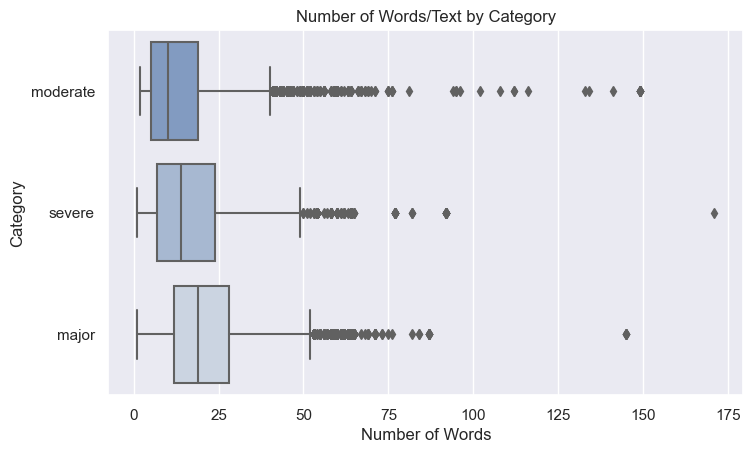

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure
sns.set(rc={'figure.figsize':(8, 5)})
ax = plt.axes()

# Plot chart
ax = sns.boxplot(chart_df, x='Words', y=label_name,
                 palette=sns.light_palette(color='#79C', reverse=True, n_colors=4))

# Set Properties
ax.set(title='Number of Words/Text by Category')
ax.set(xlabel='Number of Words', ylabel='Category')
plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

## 3 - Data Cleaning & Feature Engineering

The next section involves data cleaning and feature engineering, which are two important steps in preparing data for machine learning models. The data cleaning phase involves identifying and handling any errors, inconsistencies, or missing data in the dataset. This could involve tasks such as imputing missing values, handling outliers, and transforming the data into a more usable format.

Feature engineering involves the creation of new features or modifying existing features in the dataset to improve the predictive power of the machine learning model. This can involve tasks such as scaling the data, creating new features by combining existing ones, or reducing the dimensionality of the dataset. Feature engineering can also involve domain-specific knowledge, such as creating features that are relevant to the specific problem being solved.

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.preprocessing import LabelEncoder

# Download nltk data - only needed once
# nltk.download('stopwords')
# nltk.download('punkt')

class DataCleaning():
    """
    Class to perform various data-cleaning (pre-processing) tasks
    See individual methods for details
    """
    def __init__(self):
        
        # Will be updated with classes names once encoded
        self.class_labels = None
        
        return
    
    def remove_duplicates(self, df, subset):
        """
        Remove duplicate entries in a dataframe
        df........: Pandas dataframe to be de-duplicated
        subset....: String to select column to be de-duplicated
        Returns...: De-duplicated dataframe
        """
        return df.drop_duplicates(subset=[subset])
    
    def remove_punctuation(self, df, subset):
        """
        Remove punctuation from text in dataframe
        df........: Pandas dataframe to have punctuation removed
        subset....: String to select column to remove punctuation from
        Returns...: Dataframe (series) without punctuation 
        """
        return df[subset].apply(lambda x: re.sub(r'[^\w\s]+', '', x))

    def remove_numbers(self, df, subset):
        """
        Remove numbers from text in dataframe
        df........: Pandas dataframe to have numbers removed
        subset....: String to select column to remove numbers from
        Returns...: Dataframe (series) without numbers 
        """
        return df[subset].apply(lambda x: re.sub(r'[0-9]+', '', x))   

    def remove_extra_spaces(self, df, subset):
        """
        Remove extra spaces from text in dataframe
        df........: Pandas dataframe to have extra spaces removed
        subset....: String to select column to remove extra spaces from
        Returns...: Dataframe (series) without extra spaces 
        """
        return df[subset].apply(lambda x: re.sub(' +', ' ', x))  

    def remove_stopwords(self, df, subset):
        """
        Remove extra stop words from text in dataframe
        df........: Pandas dataframe to have stop words removed
        subset....: String to select column to remove stop words from
        Returns...: Dataframe (series) without stop words
        """   
        return df[subset].apply(self.remove_stopwords_helper)
    
    def convert_lowercase(self, df, subset):
        """
        Convert words to lower case
        df........: Pandas dataframe to have words converted to lower case
        subset....: String to select column to converted to lower case to
        Returns...: Dataframe (series) without text converted to lower case
        """           
        return df[subset].str.lower()

    def remove_stopwords_helper(self, text):
        """
        Helper function to remove English stop words from a text,
            allowing it to be applied to a column in a Pandas dataframe
        text......: Text to have stop words removed
        Returns...: Text without stop words
        """   
        # Define English stopwords
        stop_words = set(stopwords.words('english'))

        # Tokenize text
        word_tokens = word_tokenize(text)

        # Filter stop words from text
        filtered_text = [w for w in word_tokens if not w.lower() in stop_words]

        # Rebuild sentence
        filtered_sentence = ' '.join(filtered_text)

        return filtered_sentence
        
# Initialize class
dc = DataCleaning()

clean_df = data_raw_df.copy()

In [17]:
# Remove duplicates in train and test dataset
# clean_df = dc.remove_duplicates(clean_df, text_col)

### 3.1 - Converting Text to Lowercase

The descriptions currently have words in uppercase and lowercase. Changing the entire text to lowercase ensures that words with the same spelling but different cases are treated as the same word. This reduces the number of unique words in the text, making it easier to analyze and process. Lowercasing text also reduces the size of the vocabulary, which can help save memory and processing time in some models.

In addition, lowercasing text allows for case-insensitive searching and matching, which is helpful for some NLP tasks like information retrieval, where the goal is to find documents or passages containing specific keywords, regardless of their case.

In [18]:
# Convert text to lower case
clean_df[text_col] = dc.convert_lowercase(clean_df, text_col)

### 3.2 - Removing Punctuation

Punctuation marks, such as commas, periods, and exclamation points, can add noise to the text data and make it more difficult for the algorithm to accurately classify the documents. Additionally, different forms of punctuation can have varying degrees of significance and can affect the results of the analysis. By removing punctuation, the data can be simplified and made more consistent, which can improve the quality of the results.

Leaving in punctuation marks can also lead to overfitting, where the model becomes too closely tied to the training data and does not generalize well to new data. This is because punctuation marks can have a disproportionate influence on the results, especially if the model is overly sensitive to specific forms of punctuation. Removing punctuation can help to reduce the risk of overfitting by making the data more consistent and reducing the influence of individual features.

In [19]:
# Remove punctuation from train and test dataset
clean_df[text_col] = dc.remove_punctuation(clean_df, text_col)

### 3.3 - Removing Numbers

Numbers can add noise to the text data and make it more difficult for the algorithm to accurately classify the documents. Additionally, different forms of numbers can have varying degrees of significance and can affect the results of the analysis. By removing numbers, the data can be simplified and made more consistent, which can improve the quality of the results.

Leaving numbers in the dataset can also lead to overfitting, where the model becomes too closely tied to the training data and does not generalize well to new data. This is because numbers can have a disproportionate influence on the results, especially if the model is overly sensitive to specific forms of numbers. Removing numbers can help to reduce the risk of overfitting by making the data more consistent and reducing the influence of individual features.

In some other cases, however, numbers can provide important information and should be retained in the dataset. For example, in a dataset containing product reviews, the ratings or prices of the products can be crucial features that should be included in the analysis. However, this is not the case for the task at hand.

In [20]:
# Remove numbers from train and test dataset
clean_df[text_col] = dc.remove_numbers(clean_df, text_col)

### 3.4 - Removing Extra Spaces

Extra spaces can add noise to the text data and make it more difficult for the algorithm to accurately classify the documents. Additionally, different forms of extra spaces can have varying degrees of significance and can affect the results of the analysis. By removing extra spaces, the data can be simplified and made more consistent, which can improve the quality of the results.

Leaving extra spaces in the dataset can also lead to overfitting, where the model becomes too closely tied to the training data and does not generalize well to new data. This is because extra spaces can have a disproportionate influence on the results, especially if the model is overly sensitive to specific forms of extra spaces. Removing extra spaces can help to reduce the risk of overfitting by making the data more consistent and reducing the influence of individual features.

In [21]:
# Remove extra-spaces from train and test dataset
clean_df[text_col] = dc.remove_extra_spaces(clean_df, text_col)

### 3.5 - Removing Stopwords

Stop words are common words that appear frequently in text data and do not carry much meaning, such as "the", "and", "of", etc. While these words can be important for natural language processing tasks such as text summarization or question answering, they are not typically useful for text classification tasks.

By removing stop words, the data can be simplified and made more focused, which can improve the quality of the results. Additionally, removing stop words can also reduce the dimensionality of the feature matrix, which can improve the computational efficiency of the analysis and reduce the risk of overfitting.

In some cases, stop words can be important for certain text classification tasks, such as sentiment analysis. In such cases, it is important to carefully consider the role of stop words in the data and how they should be represented in the feature matrix to ensure that the results are accurate and meaningful. However, this is not the case for the task at hand.

In [22]:
# Remove English stopwords from train and test dataset
clean_df[text_col] = dc.remove_stopwords(clean_df, text_col)

## 4 - Model Building

### 4.1 - Feature Extraction

Raw data, in the form of a sequence of symbols, cannot be directly processed by algorithms as they typically require numerical feature vectors, which are representations of the data in numerical form. These feature vectors must have a fixed size, meaning that they must have a pre-defined number of elements or features. This is because algorithms are designed to work with numerical data, and they are often unable to handle the raw text documents with variable length.

Raw text documents can have varying lengths, meaning that each document may contain a different number of symbols, words, or sentences. This can make it difficult for algorithms to handle the raw text data, as they typically require a consistent and well-defined structure. By converting the raw text data into numerical feature vectors, the data can be transformed into a more structured form that can be easily processed by algorithms.

#### Feature Extraction Methodology Employed in this Project and Justification

For this project I will be using **TF-IDF** (Term Frequency-Inverse Document Frequency) is a numerical statistic used to weigh the importance of words in a document or corpus of documents. It is commonly used in information retrieval and text mining to determine the relevance of a document to a specific query.

The project involves a text classification problem. TF-IDF can be used to extract features from text data and represent them in a numerical format suitable for the task at hand. The TF-IDF statistic reflects the significance of a word within a document in relation to an entire collection of documents. The concept is that a word appearing frequently within a document, but only rarely throughout the entire collection, conveys more information than a word that appears often in both the document and the collection.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert a collection of raw documents to a matrix of TF-IDF features
tfidf = TfidfVectorizer(min_df=0.05, max_df=0.95, ngram_range=(1, 1), 
                        norm='l2', sublinear_tf=False, stop_words=None, 
                        lowercase=False)

> #### Parameters Used in the TfidfVectorizer Instance and Justification:
> * min_df=0.05: This specifies the minimum frequency of a word in the document collection in order for it to be included in the feature matrix. In this case, a word must appear in at least 5% of the documents to be included. This avoids names and unique words that are not very informative. 
> * max_df=0.95: This specifies the maximum frequency of a word in the document collection in order for it to be included in the feature matrix. In this case, a word must not appear in more than 95% of the documents to be included. This avoids stopwords, which may have failed to be removed as part of the data cleaning process.
> * ngram_range=(1, 1): This specifies that only unigrams should be included in the feature matrix.
> * norm='l2': This specifies that the feature vectors should be normalized using the L2 norm.
> * sublinear_tf=False: This specifies that the term frequency should not be replaced with a logarithmically-scaled version.
> * stop_words=None: This specifies that no stop words should be removed from the documents since they have been already removed in the data cleaning process.
> * lowercase=False: This specifies that the text should not be converted to lowercase before processing since this has been already completed in the data cleaning process.

### 4.2 - Matrix Factorization

Matrix factorization is a technique used to decompose a matrix into smaller, more manageable matrices, making it easier to analyze and extract insights from the data. The goal is to factorize a matrix into two or more matrices that can be multiplied together to recreate the original matrix, while at the same time capturing the most important information in the data. This technique is particularly useful in machine learning applications where the data is high-dimensional and complex, as it allows for the reduction of the dimensionality of the data, which in turn helps to improve model performance. Matrix factorization has numerous applications, including image and signal processing, recommendation systems, and natural language processing, among others.

In [24]:
# Learn vocabulary and idf on complete dataset
tfidf.fit(clean_df[text_col])

None

### 4.3 -Train/Test Split

To build the model, I will adhere to the standard machine learning best practices and adopt the hold-out method for model evaluation. I will partition the train dataset into distinct train and test datasets, with a typical split ratio of 80% of the data reserved for training and the remaining 20% of the data held back for testing. This approach enables me to train the model on a sufficiently large amount of data while also allowing me to evaluate its performance on unseen data. By using the hold-out method, I can ensure that the model has not simply memorized the training data and is capable of generalizing to new, unseen data.

In [25]:
from sklearn.model_selection import train_test_split

# Split model using a 0.8 train x 0.2 test ratio 
# (making copy since data will be reused later to test supervised models)
X_train, X_test, y_train, y_test = train_test_split(
    clean_df[text_col].copy(), clean_df[label_name].copy(), 
    test_size=0.2, random_state=0)

### 4.4 - NMF Class

For this project I will use NMF, which is a common technique in NLP for dimensionality reduction and feature extraction. I've chosen NMF for the following reasons:

* Interpretability: NMF produces non-negative factor matrices that can be interpreted as meaningful features or topics. This allows researchers to gain insights into the underlying structure of the data and identify important themes or patterns.
* Sparse Representation: NMF produces a sparse representation of the data, which can be beneficial for reducing noise and improving the efficiency of subsequent analysis steps.
* Feature Extraction: NMF can extract useful features from high-dimensional text data, making it easier to classify or cluster documents based on their content.
* Scalability: NMF is a scalable technique that can be applied to large datasets without requiring significant computational resources.
* Domain-Specific Applications: NMF has been successfully applied to a wide range of NLP tasks, including text classification, topic modeling, sentiment analysis, and recommendation systems, among others.

To that end, I have created an NMF class that encompasses all fundamental steps to train the model and calculate its performance metrics such as accuracy, precision, recall, F1-score, confusion matrix and ROC curves.

In [26]:
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

class NMFClass():
    """
    Class to perform various NMF-related functions
    See individual methods for details
    """
    def __init__(self, train_data, train_label, nmf):
        """
        Initialize class
        train_data...: Transformed feature matrix    
        train_label..: Labels
        nmf..........: Classifier to be trained
        """        
        # Dataframe with BBC dataset
        self.train_data = train_data.copy()
        
        # Fit label encoder
        self.le = LabelEncoder()
        self.le.fit(train_label)        
        
        # Base labels that will be used for permutation
        # Using Pandas to keep original sorting order
        self.labels = list(self.le.classes_)

        # Dict to map values to categories
        self.labels_dict = dict(zip(np.arange(len(self.labels)), self.labels))
        
        # Non-Negative Matrix Factorization model
        self.nmf = nmf

        # Transformed feature matrix: will be updated after nmf fit
        self.transf_feature_matrix = None
        
        # To be updated with metric information
        self.metrics = {}
        self.confusion_matrix = None
    
        return
        
    def fit(self, feature_matrix):
        """
        Fit a Non-Negative Matrix Factorization model given a document-term matrix
        feature_matrix...: Document-term sparse matrix    
        Returns..........: Transformed feature matrix
        """
        # Fit model
        self.nmf = self.nmf.fit(feature_matrix)
        
        return self.nmf
    
    def predict(self, feature_matrix):
        """
        Predict label based on the transformed feature matrix and compute probabilities for each class
        Returns.....: Array of predicted labels and probabilities of each class
        """
        # Transform feature matrix
        transf_feature_matrix = self.nmf.transform(feature_matrix)
        
        # Get the index of the prediction with highest probability
        y_pred = np.array([np.argmax(x) for x in transf_feature_matrix])
        
        # Adjust shape of predicted array to conform with Sklearn metrics functions
        y_pred = y_pred.reshape(y_pred.shape[0])
        
        # Compute probabilities for ROC (handles 0 division)
        transf_feature_matrix_sum = transf_feature_matrix.sum(axis=1, keepdims=True)
        probs = np.divide(transf_feature_matrix, transf_feature_matrix_sum, 
                          out=np.zeros_like(transf_feature_matrix), 
                          where=transf_feature_matrix_sum != 0)
               
#         probs = transf_feature_matrix / transf_feature_matrix.sum(
#             axis=1, keepdims=True)
        
        return y_pred, probs
        
    def label_permutation(self, y_true, y_pred, probs, label_perms=None):
        """
        Find the best label permutations based on accuracy metric
        y_true......: Numpy array with true labels
        y_pred......: Numpy array with predicted labels
        probs.......: Class probabilities calculated by predict
        Returns.....: Tuple with best label order and accuracy for it
        """
        # Max number elements for permutations
        n = len(self.labels)

        # If label permutations is not passed by caller,
        #   generate list of all possible permutations of labels
        if label_perms is None:
            label_perms = list(itertools.permutations(range(n)))    

#         print(len(label_perms))
            
        # Variables to hold max accuracy and corresponding permutation
        best_accuracy = 0
        best_perm = None    
        
        # Iterate list of permutations
        i = 0
        for label_perm in label_perms:

            i += 1
            # Replaces label in dataframe with corresponding 
            #   element in the current permutation
            y_pred_perm = np.vectorize(lambda x: label_perm[x])(y_pred)

            # Compute accuracy
            label_accuracy = accuracy_score(y_true, y_pred_perm)            

            # If accuracy is highest assign it to the return value along 
            #   with corresponding permutation and calculate other scores
            if label_accuracy > best_accuracy:
                label_metrics = {}
                best_accuracy = label_accuracy
                best_perm = label_perm
                
                # Prediction after applying permutation
                best_y_pred = y_pred_perm
                
                # Additional metrics
                self.metrics['accuracy'] = round(label_accuracy, 4)                
                self.metrics['precision'] = round(
                    precision_score(y_true, y_pred_perm, average='weighted'), 4)
                self.metrics['recall'] = round(
                    recall_score(y_true, y_pred_perm, average='weighted'), 4)
                self.metrics['f1_score'] = round(
                    recall_score(y_true, y_pred_perm, average='weighted'), 4)  
                self.confusion_matrix = confusion_matrix(y_true, y_pred_perm)

        # Resort probabilities based on best permutation
        ind_best_perm = np.array(best_perm).argsort()        
        self.metrics['probs'] = probs[:, ind_best_perm]

        # Compute ROC_AUC
        # Need to binarize predictions for multiclass ROC AUC
        label_binarizer = LabelBinarizer().fit(y_true)
        y_onehot = label_binarizer.transform(y_true)   

        self.metrics['roc_auc'] = round(roc_auc_score(
            y_onehot, self.metrics['probs'], multi_class='ovr', average='weighted'), 4)        
        
        # Return best permutation, best accuracy and additional metrics
        return (best_y_pred, best_perm)

    def get_top_words(self, all_features, label_order, top_words=5):
        
        # Dict will hold results
        top_words_dict = {}
        
        # Iterate classes
        for topic_idx, topic in enumerate(self.nmf.components_):

            # Build list with top-n features for each topic
            top_words_list = []
            
            # Argsort is sorted in ascending order. 
            #   The second -1 inverts the order of the list
            for top_word in topic.argsort()[:(-top_words - 1):-1]:
                top_words_list.append(all_features[top_word])

            # Add list to dictionary
            top_words_dict['Class: ' + 
                           self.labels_dict[label_order[topic_idx]]] = top_words_list
            
        return top_words_dict

### 4.5 - Fit Model with Default Parameters and Predict Results on Train Data

Training a machine learning model with default parameters as a baseline is a common practice in data science. By using the default parameters, the model can be evaluated in its simplest form, giving us a baseline for comparison when we experiment with various hyperparameters or more complex models. The default settings are usually the ones that are built into the algorithm, and they may be the most optimal for some datasets, but not for others. Hence, the baseline provides a benchmark for the model's performance that can be improved upon with further tuning and experimentation.

In [27]:
%%time

# Instantiate class using default parameters for NMF model
nmf = NMFClass(X_train, y_train, NMF(n_components=n_classes,
                                     max_iter=1000,
                                     random_state=0))

# Start time to measure performance
t0 = time.time()

# Transform train features
train_features = tfidf.transform(X_train)

# Fit initial model
nmf.fit(train_features)

# Predict labels
y_train_pred, train_probs = nmf.predict(train_features)

# Transform category labels into their corresponding values
y_train_val = nmf.le.transform(y_train)

# print(y_train_val, y_train_pred, train_probs)
# Update prediction and calculate metrics of initial model based on best 
#   label permutation
y_train_pred, train_label_order = \
    nmf.label_permutation(y_train_val, y_train_pred, train_probs)

# Extract metrics
train_metrics = nmf.metrics.copy()
train_confusion_matrix = nmf.confusion_matrix.copy()

# Calculate performace
train_metrics['performance'] = round((time.time() - t0), 4)

# Show results
pd.DataFrame([('Default', train_label_order, train_metrics['accuracy'])],
             index=['Train Data'],
             columns=['Parameters', 'Label Order', 'Accuracy'])

CPU times: total: 266 ms
Wall time: 272 ms


,Parameters,Label Order,Accuracy
Train Data,Default,"(2, 1, 0)",0.8895


> #### Analysis
> * The accuracy result on a model with **default parameters** using **training data** was **0.8895**, which is very reasonable as a starting point. Later in this section I will perform model optimization and I expect the results to improve. However, it is still necessary to test the model with new, unseen data to ensure that it is generalizable and not overfitting to the training data.

#### Top 5 Words for Each Category
Fitting the model on the train data produced top words that are very similar to those observed in the Wordcloud plots. For example, for the "severe" category, the top two words observed were "listeria" and "monocytogenes", which are consistent with the previous Wordcloud results for this particular category.

In [28]:
top_categ_df = pd.DataFrame(nmf.get_top_words(tfidf.get_feature_names_out(), train_label_order))
top_categ_df

,Class: severe,Class: moderate,Class: major
0,listeria,undeclared,products
1,monocytogenes,product,due
2,contaminated,contain,recalled
3,potential,may,recall
4,may,milk,recalling


### 4.6 - Fit Model with Default Parameters and Predict Results on Test Data

In [29]:
# Start time to measure performance
t0 = time.time()

# Predict labels
test_features = tfidf.transform(X_test)
y_test_pred, test_probs = nmf.predict(test_features)

# Transform category labels into their corresponding values
y_test_val = nmf.le.transform(y_test)

# Update prediction and calculate metrics of initial model based on best 
#   label permutation
y_test_pred, test_label_order = \
    nmf.label_permutation(y_test_val, y_test_pred, test_probs)

# Extract metrics
test_metrics = nmf.metrics.copy()
test_confusion_matrix = nmf.confusion_matrix.copy()

# Calculate performace
test_metrics['performance'] = round((time.time() - t0), 4)

# Show results
pd.DataFrame([('Default', test_label_order, test_metrics['accuracy'])],
             index=['Test Data'],
             columns=['Parameters', 'Label Order', 'Accuracy'])

,Parameters,Label Order,Accuracy
Test Data,Default,"(2, 1, 0)",0.8893


> #### Analysis
> * The accuracy result on a model with **default parameters** using **test data** was **0.8893**, which is very similar to the results obtained with test data. The similarity with the result on the training data suggests that the model is not overfitting to the training data, which is a very encouraging outcome. Parameter tuning and experimentation can build upon this foundation to improve the model's performance even further.

### 4.7 - Initial Model Evaluation

In this section of the project, I perform model evaluation using various metrics and provide visualizations to interpret the results. By using these metrics, I am able to evaluate the performance of the model and identify any areas for improvement. Additionally, visualizations such as ROC curves and precision-recall curves provide a useful way to interpret the performance of the model in a graphical format. These charts can be used to compare the performance of different models and select the best performing one.

#### Summary of Metrics

In evaluating the model's performance using several metrics, it is apparent that the default model produced impressive results, particularly in ROC-AUC. Both the train and test data ROC-AUC results exceeded **0.96**, which is a great score for a model trained using default parameters. Other metrics, such as precision, recall, and F1-score, were also relatively high, with scores exceeding **0.88**. These results indicate that the model was able to accurately classify the text into their respective categories reliably. It is important to note that this was achieved with default model parameters, which underscores the potential for further improvement with hyperparameter tuning or other advanced modeling techniques. 

In [30]:
# Consolidate all metrics in one Pandas dataframe
metrics_df = pd.DataFrame([train_metrics, test_metrics],
                          index=['Train Data', 'Test_Data'])

metrics_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'performance']]

,accuracy,precision,recall,f1_score,roc_auc,performance
Train Data,0.8895,0.9106,0.8895,0.8895,0.9703,0.2696
Test_Data,0.8893,0.9099,0.8893,0.8893,0.9683,0.0648


**ROC AUC**

ROC-AUC is a widely used evaluation metric in binary classification problems. It measures the ability of the model to distinguish between positive and negative instances by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold values.

In the context of multilabel classification, individual ROC-AUC charts are created for each category or label to assess the model's performance for that particular label. This approach allows the model's performance to be evaluated in a more granular manner, providing deeper insights into the model's strengths and weaknesses for each label.

By creating individual ROC-AUC charts for each category rather than just averaging out the results, the performance of the model can be compared across different labels. This can help identify which labels the model is performing well on and which labels it is struggling with. Additionally, this approach can help identify which labels have imbalanced data or class distribution, which can affect the model's overall performance. 

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
    
# Function to plot each ROC-AUC as a subplot
def plot_subplot(axis, class_id, class_desc, dataset_type):
    axis.plot([0, 1], [0, 1], 'k--', label='chance level (AUC = 0.5)')
    axis.axis('square')
    axis.set_xlabel('False Positive Rate')
    axis.set_ylabel('True Positive Rate')
    axis.set_title(f'One-vs-Rest ROC curve\n' +
                   f'Category: {class_desc} vs the rest\n' +
                   f'{dataset_type}')
    axis.legend(loc='lower right')
    return

def plot_roc_auc(y_onehot, probs, dataset_type='Train Data'):
    # Initialize figure
    cols = 3
    rows = 2
    fig, axs = plt.subplots(rows, cols, figsize=(15, 10))  
    class_id = 0
    
    # Iterate subplots
    for row in range(rows):
        for col in range(cols):    

            # Make sure we don't exceed the number of categories
            if class_id < n_classes:
                class_desc = np.vectorize(nmf.labels_dict.get)(class_id)

                # Plot ROC AUC
                display = RocCurveDisplay.from_predictions(
                    y_onehot[:, class_id],
                    probs[:, class_id],
                    name = f'{class_desc} vs the rest',
                    color = 'darkorange',
                    ax=axs[row, col]
                )

                # Delete unused subplots
                plot_subplot(axs[row, col], class_id, class_desc, dataset_type)
                
            else:
                fig.delaxes(axs[row, col])
            
            class_id += 1            

    # Plot and close chart
    plt.tight_layout(pad=2.0)
    plt.show()
    plt.close()
    None
    
    return

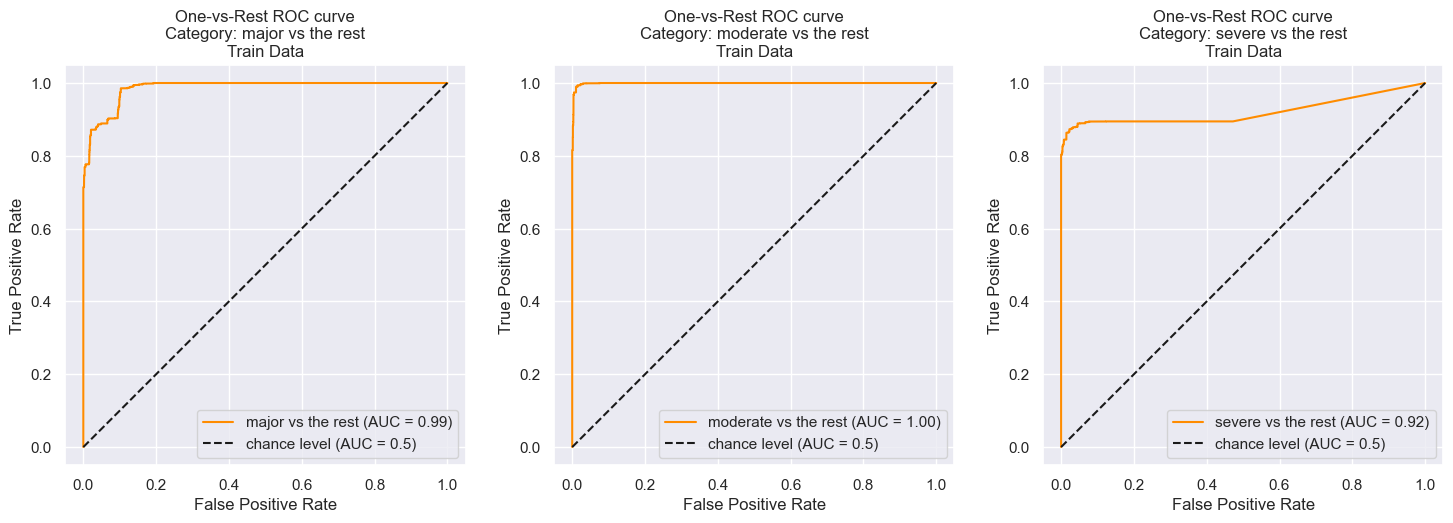

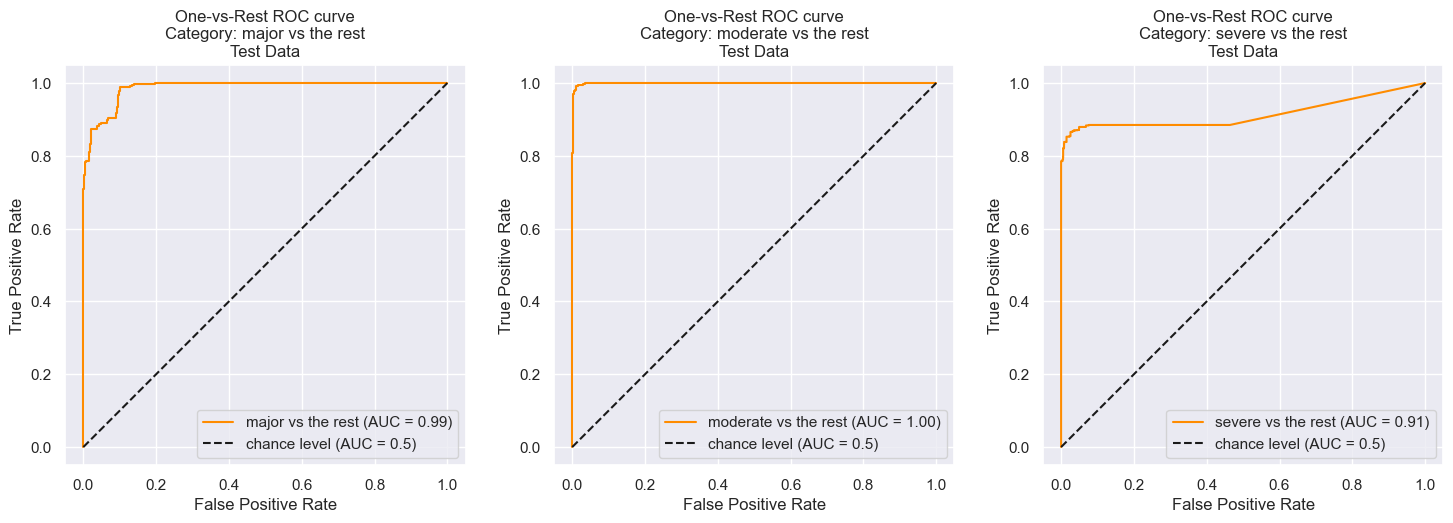

In [32]:
from sklearn.preprocessing import LabelBinarizer

# Need to binarize predictions for multiclass ROC AUC
y_onehot = LabelBinarizer().fit_transform(y_train_val)

# Plot chart for train data
plot_roc_auc(y_onehot, train_metrics['probs'])

# Need to binarize predictions for multiclass ROC AUC
y_onehot = LabelBinarizer().fit_transform(y_test_val)

# Plot chart for test data
plot_roc_auc(y_onehot, test_metrics['probs'], 'Test Data')

> #### Analysis
> * As we can see from the plots above the ROC-AUC charts show that the model's performance is excellent, with an overall ROC-AUC greater than **0.99**. This indicates that the model is very effective at distinguishing between positive and negative instances for most of the categories. <br><br>
>
> * However, the "severe" category produces a ROC-AUC of **0.92**, which is slightly lower than the other categories. This suggests that the model may be struggling to correctly identify instances in this category. Nevertheless, a ROC-AUC of 0.92 is still considered a very good result, especially considering that the model was trained using default parameters. The analysis suggests that hyperparameter tuning could potentially improve the model's performance, which could lead to even better results across all categories.

**Confusion Matrix**

A confusion matrix is a table that is used to evaluate the performance of a machine learning model by comparing the predicted labels to the true labels. It shows the number of true positives, true negatives, false positives, and false negatives for each category or label in a multilabel classification problem.

However, using absolute numbers in a confusion matrix can sometimes be difficult to interpret because it does not take into account the relative proportions of the different categories or labels. For example, a large number of false positives or false negatives in a category with very few instances may not be as important as a smaller number of false positives or false negatives in a category with many instances.

To address this issue, I used percentages instead of absolute numbers. By using percentages, the relative proportions of correct and incorrect classifications for each category can be more easily seen, making it easier to interpret the results.

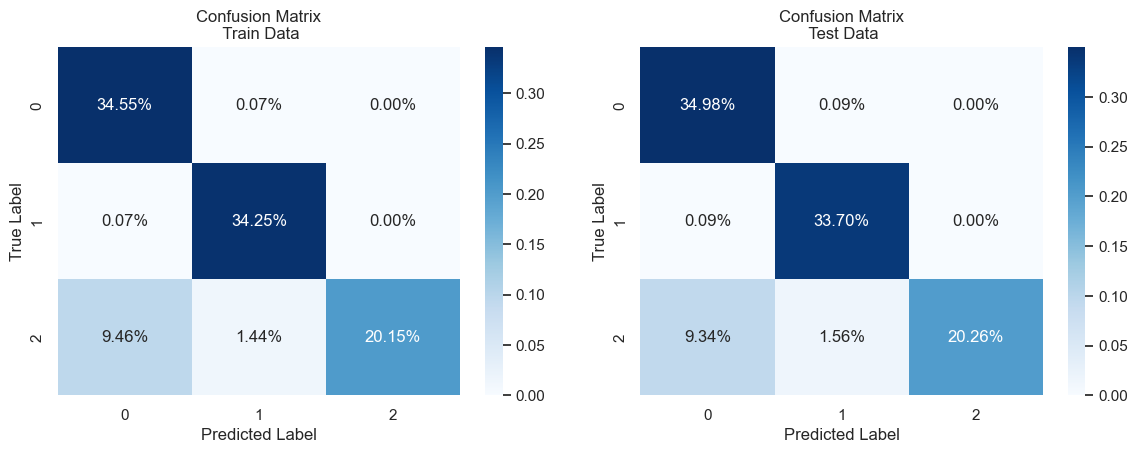

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot charts
axs[0] = sns.heatmap(train_confusion_matrix/np.sum(train_confusion_matrix), 
                     annot=True, fmt='.2%', cmap='Blues', ax=axs[0])
axs[0].set(title='Confusion Matrix\n Train Data')
axs[0].set(xlabel='Predicted Label', ylabel='True Label')

axs[1] = sns.heatmap(test_confusion_matrix/np.sum(test_confusion_matrix), 
                     annot=True, fmt='.2%', cmap='Blues', ax=axs[1])
axs[1].set(title='Confusion Matrix\n Test Data')
axs[1].set(xlabel='Predicted Label', ylabel='True Label')

plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

> #### Analysis
> * In a multilabel classification problem with 3 categories, the best possible result for each category would be 33.33% correct classification. The confusion matrix for both the train and test data showed results that were close to that result for the "major (0)" and "moderate (1)" categories. This suggests that the model is performing reasonably well for these categories. <br><br>
>
> * The confusion matrix also shows that the model struggled somewhat with the "severe (2)" category, producing a result of around 20% correct classifications. This result is consistent with the ROC-AUC results, which also indicated that the model is not performing as well for this category compared to the other categories.<br><br>
>
> * Although the results are not perfect, they are still very good, especially considering that the model was trained using default parameters. The fact that there is room for improvement in the "severe" category suggests that hyperparameter tuning could potentially lead to better results overall.


## 5 - Hyperparameter Tuning

In this section, I will be performing model tuning on the most important hyperparameters to improve the accuracy of the model. The hyperparameters chosen for tuning are solver, beta loss, regularization parameter, and alpha parameter.

To avoid the curse of dimensionality and make the tuning process more efficient, I will split the process into three steps. The first step involves tuning the solver and beta loss parameters. The solver parameter determines the optimization algorithm to use, and the beta loss parameter determines the loss function for the binarization of the output. In the second step, I will tune the regularization parameter, which controls the magnitude of the coefficients and reduces overfitting. Finally, in the third step, I will tune the alpha parameter, which balances the tradeoff between the magnitude of the coefficients and the error.

I will be using **accuracy** as the metric to evaluate the performance of the model. 

> **Note:** The optimization was performed separately. I've included the code used embedded as html cells to avoid running accidentally because these pieces of code can take a significant amount of time to run.

In [34]:
def optimize_model(nmf, X_train, y_train):
    """
    Helper function to optimize model using different hyperparameters  
    nmf...: Text to have stop words removed
    X_train...: Features
    y_train...: Labels
    Returns...: Dictionary with optimize metrics and confusion matrix
    """  
    # Transform train features
    optimize_features = tfidf.transform(X_train)

    # Fit initial model
    nmf.fit(optimize_features)    
    
    # Predict labels
    y_optimize_pred, optimize_probs = nmf.predict(optimize_features)

    # Transform category labels into their corresponding values
    y_optimize_val = nmf.le.transform(y_train)

    # Update prediction and calculate metrics of initial model based on best 
    #   label permutation
    y_optimize_pred, optimize_label_order = \
        nmf.label_permutation(y_optimize_val, y_optimize_pred, optimize_probs)

    # Update metrix
    optimize_metrics = nmf.metrics.copy()
    optimize_confusion_matrix = nmf.confusion_matrix.copy()

    return optimize_metrics, optimize_confusion_matrix

### 5.1 - Solver and Beta Loss

In the context of matrix factorization, the solver and beta loss parameters are hyperparameters that control the optimization algorithm used to factorize the matrix.

The solver parameter determines the algorithm used to solve the matrix factorization problem. There are two possible solvers available in scikit-learn: "mu" (multiplicative update) and "cd" (coordinate descent). Each solver has its own strengths and weaknesses and the choice of solver depends on the size and characteristics of the dataset.

The beta loss parameter is the loss function used to measure the quality of the model. It determines the way the model's performance is measured during the optimization process. The three possible beta loss functions are "frobenius", which measures the mean squared error between the predicted and actual values, "kullback-leibler", which measures the divergence between the predicted and actual distributions and "itakura-saito", which measures the distance or divergence between two non-negative spectra. The choice of beta loss function depends on the nature of the data and the problem being solved.

```python
# Hyperparameters to test
solver_list = ['cd', 'mu']
beta_loss_list = ['frobenius', 'kullback-leibler', 'itakura-saito']

opt_results = []

# Iterate test hyperparameters
for solver in solver_list:
    for beta_loss in beta_loss_list:

        # Not all hyperparameter combinations are allowed, need to skip invalid ones
        try:
            # Instantiate class using test hyperparameters for NMF model
            nmf = NMFClass(X_train, y_train, NMF(n_components=n_classes, 
                                                 solver=solver,
                                                 beta_loss=beta_loss,
                                                 random_state=0,
                                                 max_iter=1000))

            # Call function to test model
            optimize_metrics, optimize_confusion_matrix = optimize_model(nmf, X_train, y_train)
            
            opt_results.append([solver, beta_loss, optimize_metrics['accuracy']])
            
        except:
            pass
        
# Show results
opt_results_df = pd.DataFrame(opt_results, columns=['solver', 'beta_loss', 'accuracy'])
opt_results_df.sort_values(by=['accuracy'], ascending=False, inplace=True)
opt_results_df
```

|  |solver|beta_loss|accuracy|
|:-|:----:|:-------:|:------:|
|1|mu|frobenius|0.9783|
|0|cd|frobenius|0.8895|
|2|mu|kullback-leibler|0.8206|

> #### Analysis
> * The combination setting the "beta_loss" parameter to "frobenius" and the "solver" parameter to "mu" achieved an accuracy of **0.9783**, which is a very significant improvement compared to the baseline model with default parameters. <br><br>
> * The choice of "frobenius" as the beta loss function and "mu" as the solver algorithm is likely due the following reasons:<br>
    1. The "mu" solver is faster and more robust in certain situations, which can improve the performance of NMF.<br>
    2. The "frobenius" beta_loss tends to produce more balanced factorizations, which can improve the quality of the approximation.<br>
    3. The combination of "mu" solver and "frobenius" beta_loss may lead to a better optimization of the objective function, resulting in better factorizations.<br>

### 5.2 - Regularization Mixing Parameter (L1 Ratio)

In Non-negative Matrix Factorization (NMF), the regularization mixing parameter refers to the balance between the L1 and L2 regularization penalties used during the model training process. The choice of l1_ratio can have a significant impact on the resulting NMF model, and may be an important hyperparameter to tune during the model training process.

```python
# Hyperparameters to test
l1_ratio_list = np.arange(0, 1, 0.1)

# Hyperparameters tested so far
solver = opt_results_df.iloc[0]['solver']
beta_loss = opt_results_df.iloc[0]['beta_loss']

opt_results = []

# Iterate test hyperparameters
for l1_ratio in l1_ratio_list:

    # Not all hyperparameter combinations are allowed, need to skip invalid ones
    try:
        # Instantiate class using test hyperparameters for NMF model
        nmf = NMFClass(X_train, y_train, NMF(n_components=n_classes, 
                                             solver=solver,
                                             beta_loss=beta_loss,
                                             l1_ratio=l1_ratio,
                                             random_state=0,
                                             max_iter=1000))

        # Call function to test model
        optimize_metrics, optimize_confusion_matrix = optimize_model(nmf, X_train, y_train)

        opt_results.append([solver, beta_loss, l1_ratio, optimize_metrics['accuracy']])

    except:
        pass
        
# Show results
opt_results_df = pd.DataFrame(opt_results, 
                               columns=['solver', 'beta_loss', 'l1_ratio', 'accuracy'])
opt_results_df.sort_values(by=['accuracy'], ascending=False, inplace=True)
opt_results_df
``` 

| |solver|beta_loss|l1_ratio|accuracy|
|:-|:-:|:-:|:-:|:-:|
|0|mu|frobenius|0.0|0.9783|
|1|mu|frobenius|0.1|0.9783|
|2|mu|frobenius|0.2|0.9783|
|3|mu|frobenius|0.3|0.9783|
|4|mu|frobenius|0.4|0.9783|
|5|mu|frobenius|0.5|0.9783|
|6|mu|frobenius|0.6|0.9783|
|7|mu|frobenius|0.7|0.9783|
|8|mu|frobenius|0.8|0.9783|
|9|mu|frobenius|0.9|0.9783|

> #### Analysis
> * The regularization mixing parameter in NMF controls the balance between L1 and L2 regularization. L1 regularization promotes sparsity in the factorization, meaning that it drives many of the coefficients to zero, while L2 regularization encourages small values for all coefficients. In the case of this project, the experiment with different values of the regularization mixing parameter **did not show any improvement in accuracy**. This could be because the default value already provides a good balance between sparsity and small values of the coefficients, and other values tested did not provide any additional benefits. It could also be that the nature of the data in this project did not require heavy regularization, and the default parameter was already sufficient perhaps as a result of the thorough data cleaning process.

### 5.3 - Alpha

In NMF, alpha is a hyperparameter that controls the sparsity of the factorization. It is used to enforce additional constraints on the resulting factor matrices, making some of their values closer to zero. Specifically, alpha determines the strength of the L1 regularization penalty applied to the factor matrices. A higher alpha value results in a sparser factorization, with more of the elements in the factor matrices equal to zero. On the other hand, a lower alpha value results in a denser factorization, with fewer zero elements in the factor matrices. The optimal value of alpha depends on the specific dataset and the objectives of the analysis.

For the sake of simplicity, I have used the same value for both alpha_W and alpha_L in this project.

```python
# Hyperparameters to test
alpha_W_list = np.arange(0, 0.05, 0.002)

import warnings
warnings.filterwarnings('ignore')

# Hyperparameters tested so far
solver = opt_results_df.iloc[0]['solver']
beta_loss = opt_results_df.iloc[0]['beta_loss']
l1_ratio = opt_results_df.iloc[0]['l1_ratio']

opt_results = []

# Iterate test hyperparameters
for alpha_W in alpha_W_list:

    # Not all hyperparameter combinations are allowed, need to skip invalid ones
    try:
        # Instantiate class using test hyperparameters for NMF model
        nmf = NMFClass(X_train, y_train, NMF(n_components=n_classes, 
                                             solver=solver,
                                             beta_loss=beta_loss,
                                             l1_ratio=l1_ratio,
                                             alpha_W=alpha_W,
                                             alpha_H='same',
                                             random_state=0,
                                             max_iter=1000))

        # Call function to test model
        optimize_metrics, optimize_confusion_matrix = optimize_model(nmf, X_train, y_train)

        opt_results.append([solver, beta_loss, l1_ratio, alpha_W, optimize_metrics['accuracy']])

    except:
        pass

warnings.filterwarnings('default')

# Show results
opt_results_df = pd.DataFrame(opt_results, 
                               columns=['solver', 'beta_loss', 'l1_ratio', 'alpha', 'accuracy'])
opt_results_df.sort_values(by=['accuracy'], ascending=False, inplace=True)
pd.concat([opt_results_df.head(5), opt_results_df.tail(5)])
```

| |solver|beta_loss|l1_ratio|alpha|accuracy|
|:-|:-:|:-:|:-:|:-:|:-:|
|1|mu|frobenius|0.0|0.002|0.9929|
|2|mu|frobenius|0.0|0.004|0.9908|
|3|mu|frobenius|0.0|0.006|0.9904|
|4|mu|frobenius|0.0|0.008|0.9899|
|5|mu|frobenius|0.0|0.010|0.9881|
|20|mu|frobenius|0.0|0.040|0.9013|
|21|mu|frobenius|0.0|0.042|0.8465|
|22|mu|frobenius|0.0|0.044|0.8168|
|23|mu|frobenius|0.0|0.046|0.7436|
|24|mu|frobenius|0.0|0.048|0.6332|

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure
plt.figure(figsize=(10, 6))
ax = plt.axes()

# Dataframe for chart
chart_df = opt_results_df.sort_values(by='alpha')

# Plot chart
ax = sns.lineplot(data=chart_df, x='alpha', y='accuracy', marker='o', color='#79C')

# Annotate label points 
for x, y in zip(chart_df['alpha'], chart_df['accuracy']):    
    ax.text(x, y + 0.01, f'{y}', fontsize=7)

# Set Properties
ax.set_xlim(-0.001, 0.05)
ax.set_ylim(np.min(chart_df['accuracy']) - 0.01, 1.01)
ax.set(title='Accuracy x Alpha - Training Set')
ax.set(xlabel='Alpha', ylabel='Accuracy')
plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None
```

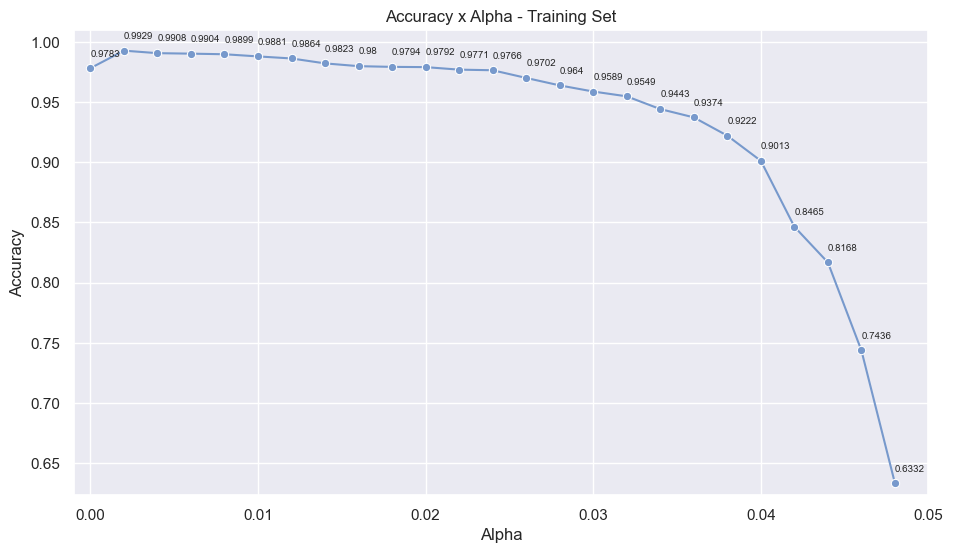

> #### Analysis
> * In Non-negative Matrix Factorization (NMF), the alpha parameter controls the regularization of the model. It adds a penalty term to the objective function that discourages overfitting and promotes sparsity in the factor matrices.
> * When alpha is increased, the penalty term becomes more influential in the objective function. This means that the model will prioritize sparsity over accuracy, leading to a more sparse factorization that may not capture all the important information in the original matrix. In other words, the model will focus more on reducing the number of non-zero elements in the factor matrices, rather than accurately approximating the original matrix.
> * In my project, increasing the alpha parameter led to lower accuracy in NMF likely because it resulted in a less informative factorization that did not capture all the relevant features in the original matrix. However, it's worth noting that the optimal value of alpha will depend on the specific problem at hand, and some datasets may benefit from a more sparse factorization, even if it comes at the cost of some loss of accuracy.

### 5.4 - Model Training After Hyper Parameter Tuning

After testing several hyperparameter combinations, I have concluded that the best selection for the model hyperparameters is as follows:

* solver: "mu"
* beta_loss: "frobenius"
* l1_ratio: 0.0
* alpha: 0.002

This combination allowed me to achieve an accuracy on training data of **0.9929**, which is a near-perfect result. The next step would be to train the model using these hyperparameters and fit it to the test data to check if there are any signs of overfitting.

#### Fit Optimized Model and Predict Results on Train Data

In [35]:
%%time

# Saves current metrics for comparison
def_train_metrics = train_metrics.copy()
def_test_metrics = test_metrics.copy()

# Instantiate class using default parameters for NMF model
nmf = NMFClass(X_train, y_train, NMF(n_components=n_classes,
                                     solver='mu',
                                     beta_loss='frobenius',
                                     l1_ratio=0.0,
                                     alpha_W=0.002,
                                     alpha_H='same',
                                     random_state=0,
                                     max_iter=1000))                                     

# Start time to measure performance
t0 = time.time()

# Transform train features
train_features = tfidf.transform(X_train)

# Fit initial model
nmf.fit(train_features)

# Predict labels
y_train_pred, train_probs = nmf.predict(train_features)

# Transform category labels into their corresponding values
y_train_val = nmf.le.transform(y_train)

# print(y_train_val, y_train_pred, train_probs)
# Update prediction and calculate metrics of initial model based on best 
#   label permutation
y_train_pred, train_label_order = \
    nmf.label_permutation(y_train_val, y_train_pred, train_probs)

# Extract metrics
train_metrics = nmf.metrics.copy()
train_confusion_matrix = nmf.confusion_matrix.copy()

# Calculate performace
train_metrics['performance'] = round((time.time() - t0), 4)

# Show results
pd.DataFrame([('Default', train_label_order, train_metrics['accuracy'])],
             index=['Train Data'],
             columns=['Parameters', 'Label Order', 'Accuracy'])

CPU times: total: 281 ms
Wall time: 286 ms


,Parameters,Label Order,Accuracy
Train Data,Default,"(2, 1, 0)",0.9929


#### Fit Optimized Model and Predict Results on Test Data

In [36]:
# Start time to measure performance
t0 = time.time()

# Predict labels
test_features = tfidf.transform(X_test)
y_test_pred, test_probs = nmf.predict(test_features)

# Transform category labels into their corresponding values
y_test_val = nmf.le.transform(y_test)

# Update prediction and calculate metrics of initial model based on best 
#   label permutation
y_test_pred, test_label_order = \
    nmf.label_permutation(y_test_val, y_test_pred, test_probs)

# Extract metrics
test_metrics = nmf.metrics.copy()
test_confusion_matrix = nmf.confusion_matrix.copy()

# Calculate performace
test_metrics['performance'] = round((time.time() - t0), 4)

# Show results
pd.DataFrame([('Default', test_label_order, test_metrics['accuracy'])],
             index=['Test Data'],
             columns=['Parameters', 'Label Order', 'Accuracy'])

,Parameters,Label Order,Accuracy
Test Data,Default,"(2, 1, 0)",0.9921


> #### Analysis
>  * Fitting the optimized model on test data allow me to achieve an accuracy of **0.9921**, which is a very similar result to the test data. This leads me to conclude that there is no evident sign of overfitting to the train data and has a very good chance of generalizing well to new data.

## 6 - Evaluation of the Optimized Model 

The evaluation process in unsupervised machine learning is typically less objective than in supervised learning because there is no ground truth for comparison. Instead, it often involves a combination of techniques such as visualization, statistical analysis, and domain expertise to assess the quality of the model output.

However, similarly to what we have done in class, I was able to use a dataset that contains labels and while the labels were NOT used in the model building and training they can be used for evaluating the model more objectively. This allowed me to compute the familiar evaluation metrics as well as plot confusion matrix and ROC-AUC.

In this section I will calculate the final metrics for the optimized model and compare them with the results with the results for the model with default parameters.


### 6.1 - Principal Component Analysis

In this project, the approach that would have been better suited for the data was non-negative matrix factorization (NMF). However, I wanted to explore the use of principal component analysis (PCA) to gain insights into how the input features were contributing to the overall variance in the dataset.

To this end, a PCA model was built and fitted to the dataset. PCA is a technique used to transform the original features into a new set of uncorrelated variables called principal components. These principal components are ordered in terms of the amount of variance that they explain in the original data. By plotting the explained variance ratio for the input features, I can understand how much variance in the original dataset can be explained by each of the principal components.

The explained variance ratio is a metric that shows the proportion of the variance in the original dataset that can be explained by each principal component. By examining the cumulative explained variance ratio, one can see how many principal components are needed to explain most of the variance in the data.

By building and fitting a PCA model and plotting the explained variance ratio, I could gain insights into the contributions of the input features to the overall variance in the dataset. This can help in feature selection and in understanding the underlying structure of the data. However, it should be noted that PCA assumes that the input features are linearly correlated and may not work well with nonlinear data.

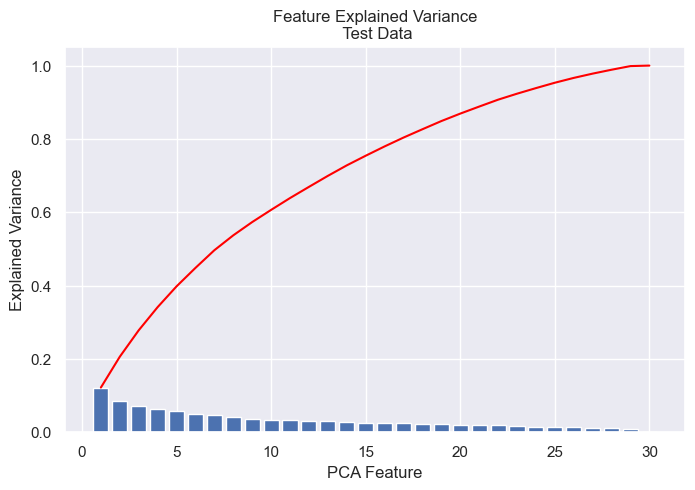

CPU times: total: 297 ms
Wall time: 313 ms


In [37]:
%%time

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA

# Split train/test data for PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    clean_df[text_col].copy(), clean_df[label_name].copy(), 
    test_size=0.2, random_state=0)

# Build and fit PCA model
train_features_pca = tfidf.transform(X_train_pca)

# Convert to DataFrame to be able to get feature names after model fit
train_features_pca_df = pd.DataFrame(train_features_pca.A, 
                                     columns=dict(sorted(tfidf.vocabulary_.items(), 
                                                         key=lambda x:x[1])).keys())
# train_features_pca_df = pd.DataFrame(train_features_pca.A, 
#                                      columns=tfidf.vocabulary_.keys())

# Fit PCA model
pca = PCA(n_components=train_features_pca_df.shape[1]).fit(train_features_pca_df)
# print(pca.feature_names_in_)

sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_
    )

plt.plot(
    range(1, len(pca.explained_variance_ratio_ ) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance Ratio')
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance')
plt.title('Feature Explained Variance\n Test Data')
plt.show()
None

> #### Analysis
> * The chart presented above displays the explained variance ratio for each input feature when a PCA model is fitted to the dataset. It shows that the amount of variance explained by the original data is fairly evenly distributed among most of the input features. This implies that most of the input features are relevant to the overall variance of the dataset, rather than just a few. <br><br>
> * It is worth noting that the top 5 features only explain about 25% of the variance in the data. Although these features are important, they alone would not be sufficient to accurately classify the data. The fact that most of the features are relevant for the model indicates that simply removing some of the input features may not be the best approach. 

#### Summary of Metrics

In [38]:
# Consolidate all metrics in one Pandas dataframe
metrics_df = pd.DataFrame([train_metrics, test_metrics,
                          def_train_metrics, def_test_metrics],
                          index=['Train Data - Optimized Model', 
                                 'Test_Data - Optimized Model',
                                 'Train Data - Default Model', 
                                 'Test_Data - Default Model'])

metrics_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 
            'performance']].sort_values(by=['accuracy'], ascending=False)

,accuracy,precision,recall,f1_score,roc_auc,performance
Train Data - Optimized Model,0.9929,0.9930,0.9929,0.9929,0.9667,0.2844
Test_Data - Optimized Model,0.9921,0.9922,0.9921,0.9921,0.9636,0.0656
Train Data - Default Model,0.8895,0.9106,0.8895,0.8895,0.9703,0.2696
Test_Data - Default Model,0.8893,0.9099,0.8893,0.8893,0.9683,0.0648


> #### Analysis
> * The table provided above presents the results of the hyperparameter optimization process for the model compared with the default model. The results indicate that the optimized model has demonstrated an improvement across most metrics for both the train and test data. The performance for most metrics is above **0.99**, indicating that the model is highly accurate in its predictions. The exception to this is the weighted averaged ROC-AUC, which did not improve as much as the other metrics. However, despite this, the overall results are highly satisfactory and indicate that the model is capable of accurately classifying the data. <br><br>
> * It is also worth noting that there is no evidence of overfitting to the train data. The absence of overfitting suggests that the model is generalizing well to new data and is not simply memorizing the characteristics of the training data. Furthermore, changing the parameters did not significantly impact the speed performance of the model. This means that the optimized model is not only highly accurate but also efficient in its computation, making it a good candidate for deployment in real-world applications.

#### ROC-AUC

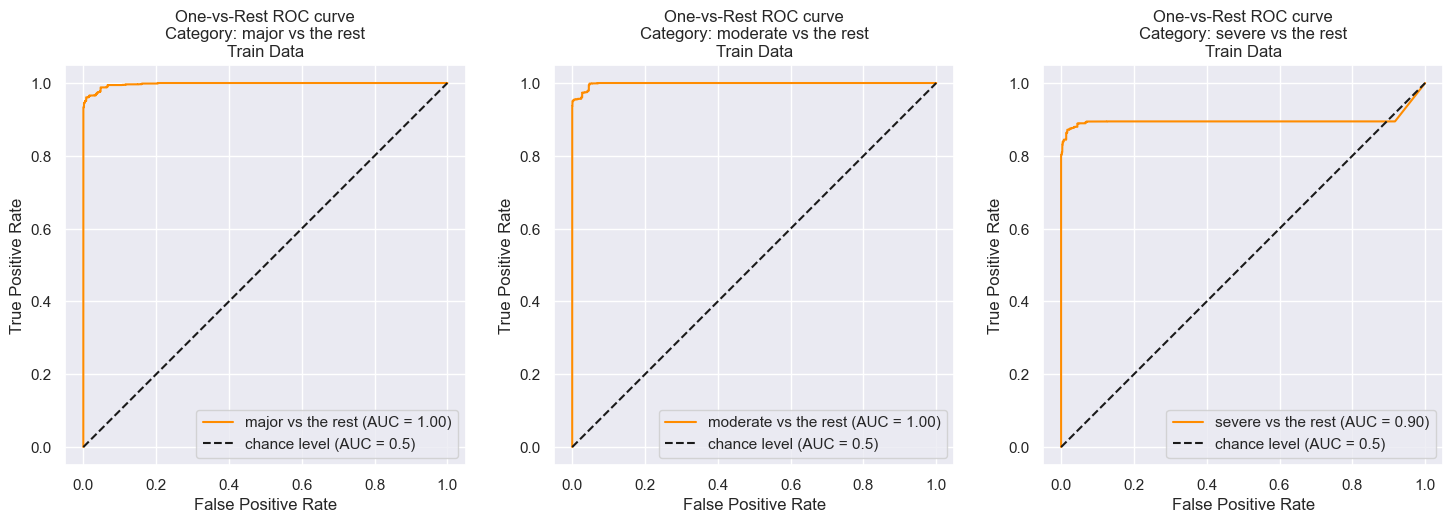

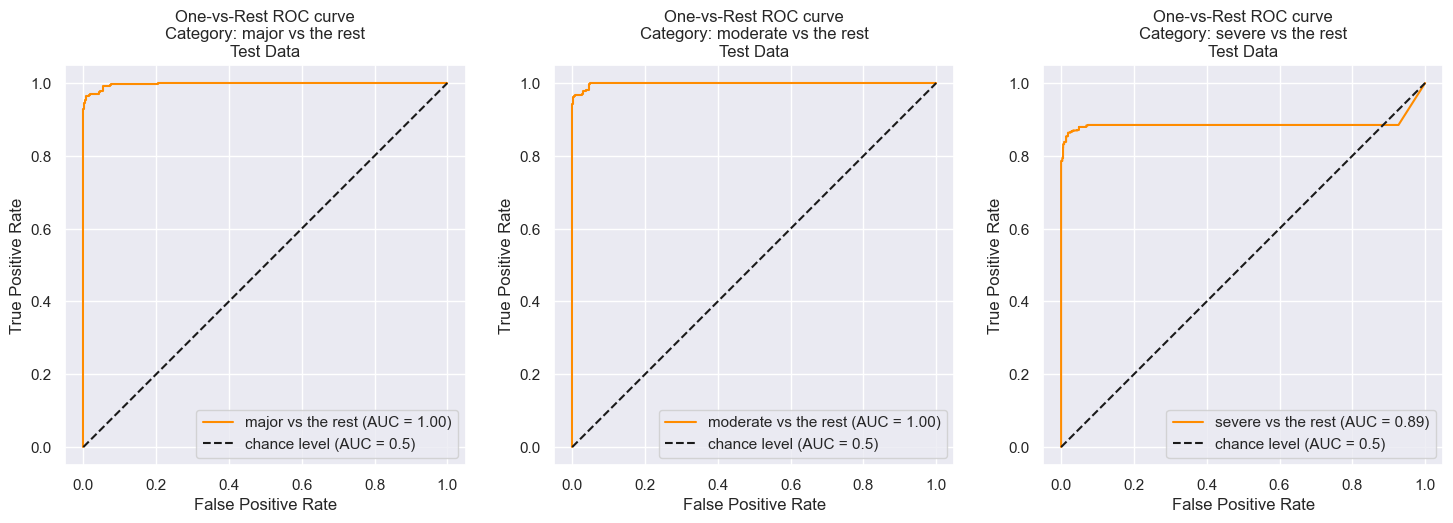

In [39]:
from sklearn.preprocessing import LabelBinarizer

# Need to binarize predictions for multiclass ROC AUC
y_onehot = LabelBinarizer().fit_transform(y_train_val)

# Plot chart for train data
plot_roc_auc(y_onehot, train_metrics['probs'])

# Need to binarize predictions for multiclass ROC AUC
y_onehot = LabelBinarizer().fit_transform(y_test_val)

# Plot chart for test data
plot_roc_auc(y_onehot, test_metrics['probs'], 'Test Data')

> #### Analysis
> * The ROC-AUC charts reveal that the model achieved near-perfect scores for both the training and test data across most categories. However, the "severe" category exhibited slightly lower performance than the other categories. It is important to emphasize that this disparity may be attributed to the excellent performance of the model for the other two categories, as evident from the confusion matrix below. Any deviation from near-perfect scores in those categories resulted in a substantial penalty, which may have adversely impacted the performance of the "severe" category.<br><br>
> * Notwithstanding this observation, the results of the model are highly impressive, and they hold significant promise for practical applications. The ability of the model to achieve such high levels of accuracy and consistency across multiple categories is indicative of its robustness and reliability. With such performance, it is reasonable to expect that the model could be readily deployed in real-life scenarios, where it could enhance decision-making processes and improve outcomes.<br><br>

#### Confusion Matrix

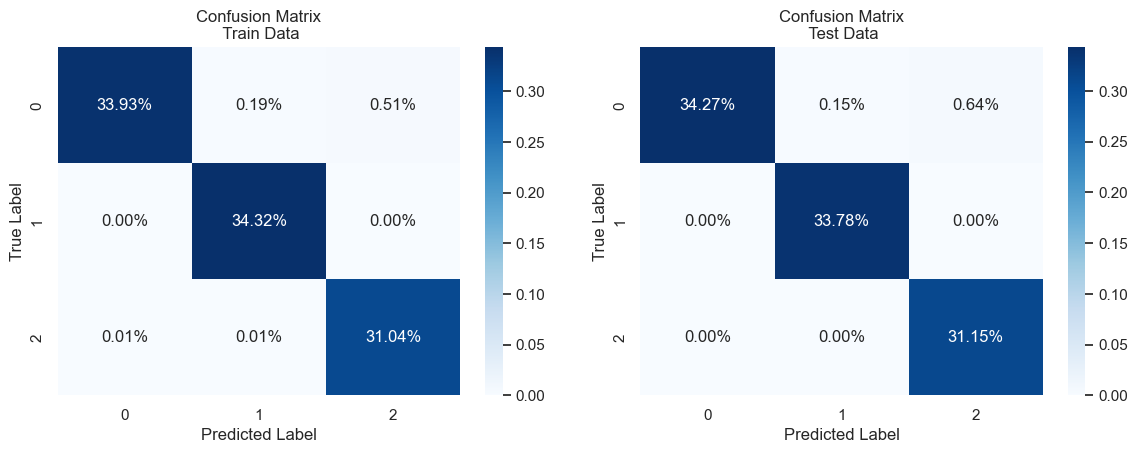

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot charts
axs[0] = sns.heatmap(train_confusion_matrix/np.sum(train_confusion_matrix), 
                     annot=True, fmt='.2%', cmap='Blues', ax=axs[0])
axs[0].set(title='Confusion Matrix\n Train Data')
axs[0].set(xlabel='Predicted Label', ylabel='True Label')

axs[1] = sns.heatmap(test_confusion_matrix/np.sum(test_confusion_matrix), 
                     annot=True, fmt='.2%', cmap='Blues', ax=axs[1])
axs[1].set(title='Confusion Matrix\n Test Data')
axs[1].set(xlabel='Predicted Label', ylabel='True Label')

plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

> #### Analysis
> * As previously discussed, in a 3-class multilabel classification model, the best one could hope for in the confusion matrix scores is an equal 33.33% correct classification for each category. However, achieving this level of perfection is not always realistic for most models. Despite this challenge, the model under evaluation performed exceptionally well and came very close to achieving this ideal goal.<br><br>
> * It is worth highlighting that the "severe" category performed only slightly worse than the other categories, with a correct classification rate of approximately 31%. Nonetheless, this is still an impressive performance given the nature of the task, and it underscores the model's robustness and reliability.<br><br>
> * Furthermore, the deviation in performance of the "severe" category also explains why the ROC-AUC score for this category did not perform as well as the other two categories. As the model's performance for the other categories was almost perfect, any deviation from near-perfect scores was heavily penalized, causing a slight dip in performance for the "severe" category.
<br><br>

#### Pairplots

I would like to create another chart to enhance my analysis, specifically a pairplot that showcases the top three features for each category. This pairplot will serve as a tool to explore how effectively these features are employed to correctly classify instances into their respective categories.

By examining the top three features for each category, my goal is to gain a more nuanced understanding of the relationship between the variables and the categories they represent. By visualizing the data in this way, I hope to identify patterns or trends that may not be immediately apparent from the raw data alone.

In [41]:
# Create DataFrame with test features
test_features_df = pd.DataFrame(test_features.A, 
                                columns=dict(sorted(tfidf.vocabulary_.items(), 
                                                    key=lambda x:x[1])).keys())

# Add target variables
test_features_df['Pred_Category'] = np.vectorize(nmf.labels_dict.__getitem__)(y_test_pred)
test_features_df['Pred_Category_Val'] = y_test_pred

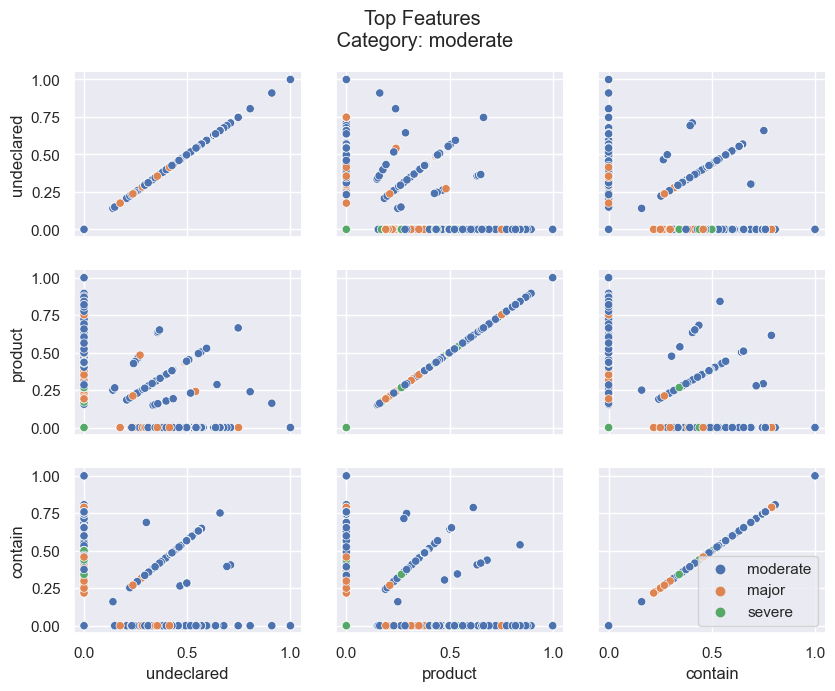

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get features for class of interest
top_features = list(top_categ_df[0:3]['Class: moderate'])
top_features.append('Pred_Category')

# Plot chart
ax = sns.pairplot(test_features_df[top_features], hue='Pred_Category', diag_kind=None)

# Set Properties
ax._legend.remove()
ax.fig.suptitle('Top Features\n Category: moderate', y=0.94)
plt.legend(loc='lower right')
plt.tight_layout(pad=2.0)
plt.show()
plt.close()


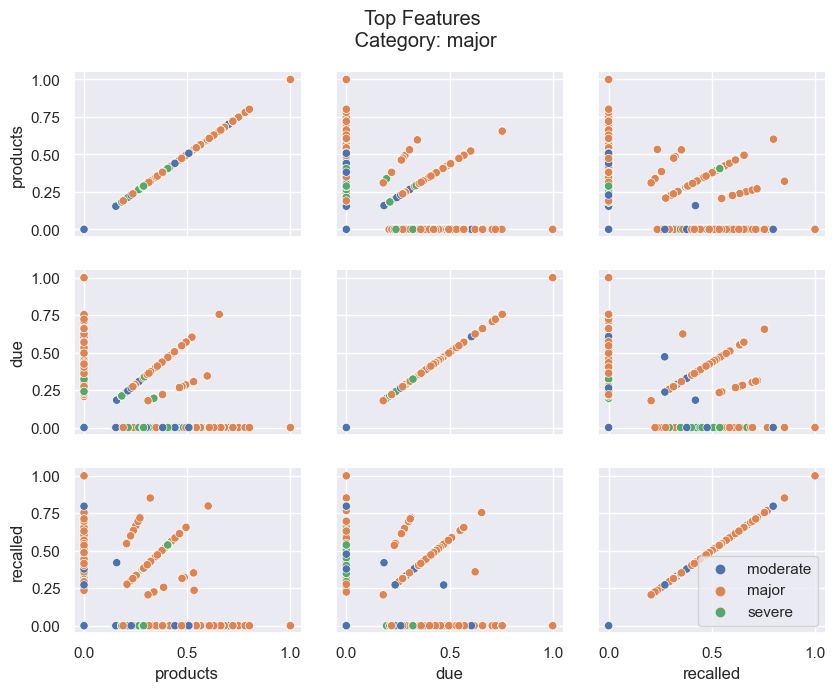

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get features for class of interest
top_features = list(top_categ_df[0:3]['Class: major'])
top_features.append('Pred_Category')

# Plot chart
ax = sns.pairplot(test_features_df[top_features], hue='Pred_Category', diag_kind=None)

# Set Properties
ax._legend.remove()
ax.fig.suptitle('Top Features\n Category: major', y=0.94)
plt.legend(loc='lower right')
plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

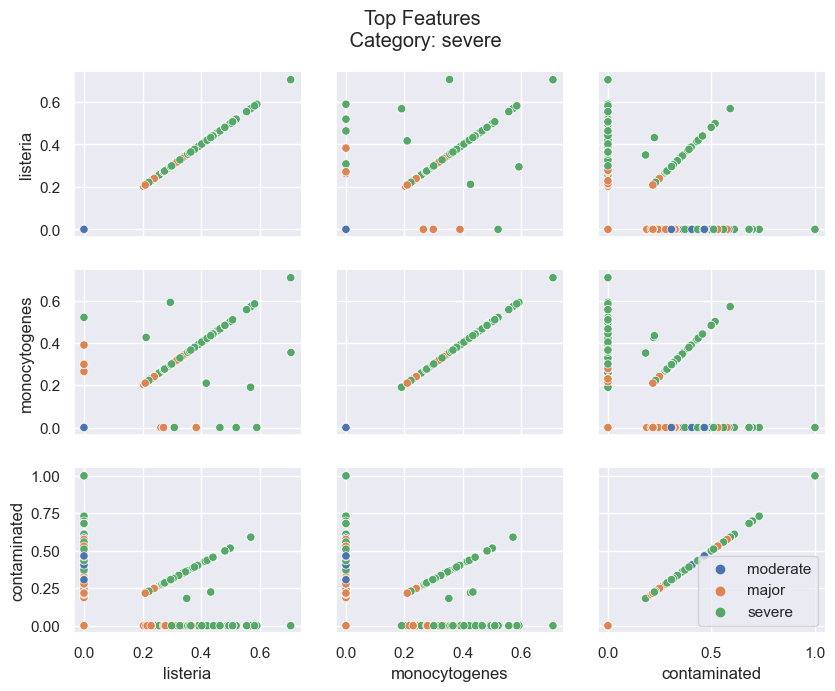

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get features for class of interest
top_features = list(top_categ_df[0:3]['Class: severe'])
top_features.append('Pred_Category')

# Plot chart
ax = sns.pairplot(test_features_df[top_features], hue='Pred_Category', diag_kind=None)

# Set Properties
ax._legend.remove()
ax.fig.suptitle('Top Features\n Category: severe', y=0.94)
plt.legend(loc='lower right')
plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

#### Analysis
> * Based on the charts presented above, it is evident that the primary keywords used as features display a strong correlation with their respective categories. Additionally, these keywords are found in only a small number of samples from other categories.<br><br>
> * For instance, the combination of "listeria" and "monocytogenes" is associated almost entirely with the "severe" category, whereas the combination of "undeclared" and "product" is typically linked with the "moderate" category. These findings highlight the effectiveness of the Non-Negative Matrix Factorization model in accurately clustering instances based on the incidence of specific words.<br><br>
> * These observations have important implications for the development of classification models, as they indicate that certain words can be used as highly indicative features for specific categories. <br><br>

## 7 - Comparison with Other Types of Machine Learning Models

### 7.1 - Bisecting KMeans

Bisecting KMeans is a clustering algorithm that is commonly used in machine learning and data mining. It is an extension of the traditional KMeans algorithm, which aims to partition data points into a predefined number of clusters based on their similarity.

The Bisecting KMeans algorithm starts by assigning all data points to a single cluster. It then iteratively bisects the largest cluster, splitting it into two smaller clusters that are more similar to each other than to the other clusters. This process continues until the desired number of clusters is reached.

At each step, the cluster that is bisected is chosen by minimizing the sum of squared errors within that cluster. This is similar to the KMeans algorithm, where the objective is to minimize the sum of squared distances between each data point and its assigned cluster centroid. However, Bisecting KMeans operates at a higher level of abstraction, where it optimizes the clustering at the level of clusters instead of individual data points.

The Bisecting KMeans algorithm can be useful when the number of clusters is not known beforehand or when the optimal number of clusters is ambiguous. It can also handle non-convex clusters, unlike traditional KMeans. However, Bisecting KMeans can be computationally expensive, as it requires repeatedly clustering the largest cluster, which can be time-consuming for large datasets.

In [45]:
%%time
from sklearn.cluster import BisectingKMeans

# Instantiate class using default parameters for Bisecting K-Means model
clf = NMFClass(X_train, y_train, BisectingKMeans(n_clusters=n_classes, random_state=0,
                                                init='k-means++', algorithm='elkan',
                                                bisecting_strategy='biggest_inertia',
                                                n_init=10, tol=10))

# Start time to measure performance
t0 = time.time()

# Transform train features
train_features = tfidf.transform(X_train)

# Fit initial model
clf.fit(train_features)

# Predict labels
y_train_pred_bkm, train_probs_bkm = clf.predict(train_features)

# Transform category labels into their corresponding values
y_train_val_bkm = clf.le.transform(y_train)

# Update prediction and calculate metrics of initial model based on best 
#   label permutation
y_train_pred_bkm, train_label_order_bkm = \
    clf.label_permutation(y_train_val_bkm, y_train_pred_bkm, train_probs_bkm)

# Extract metrics
train_metrics_bkm = clf.metrics.copy()
train_confusion_matrix_bkm = clf.confusion_matrix.copy()

# Calculate performace
train_metrics_bkm['performance'] = round((time.time() - t0), 4)

# Consolidate all metrics in one Pandas dataframe
metrics_bkm_df = pd.DataFrame([train_metrics_bkm], index=['Train Data - Bisecting KMeans'])

# Show results
pd.DataFrame([('Default', train_label_order_bkm, train_metrics_bkm['accuracy'])],
             index=['Train Data'],
             columns=['Parameters', 'Label Order', 'Accuracy'])

CPU times: total: 11.9 s
Wall time: 3.5 s


,Parameters,Label Order,Accuracy
Train Data,Default,"(0, 2, 1)",0.6116


> #### Analysis
> * Even after hyperparameter optimization (which was performed beforehand) Bisecting KMeans performed poorly compared to the NMF results obtained so far, achieving accuracy of only **0.61**.<br><br>
> * One possible reason why Bisecting KMeans did not perform as well as NMF in a specific NLP task could be due to the nature of the data. In NLP, data is often high-dimensional and sparse, meaning that the number of features is large, and many of them have a value of zero for most instances.<br><br>
> * Bisecting KMeans may struggle with high-dimensional, sparse data because it is based on the Euclidean distance between feature vectors. In such data, most points are equally far apart from each other, and it is challenging to find meaningful clusters. On the other hand, NMF is well-suited for high-dimensional, sparse data as it can reduce the dimensionality of the data by identifying the most important features.<br><br>

### 7.2 - Comparison with Supervised Learning

In this section of the analysis, I will perform a comparison between the NMF model and three supervised models, namely **Logistic Regression**, **Random Forest Classifier**, and **K-Neighbors Classifier**. The purpose of this comparison is to evaluate the effectiveness of each model in solving the given problem and to determine which model performs the best in terms of accuracy. For each model I also tested **different train x test split ratios**.

To perform the comparison, I will use the same dataset and feature engineering techniques for each model. I will split the data into training and testing sets, fit each model on the training set, and evaluate its performance on the testing set using various metrics. All models have been **optimized** using a **Random Grid Search Cross-Validation** technique with 3 splits each, which should provide a fair comparison to the optimized NMF model.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
import warnings

class superv_model():
    """
    Class to perform various supervised ML functions
    See individual methods for details
    """
    def __init__(self, clf, X_train, X_test, y_train, y_test, tfidf):
        """
        Initialize class
        clf.........: Classifier to be trained
        X_train.....: Training features
        X_test......: Training labels
        y_train.....: Test features
        y_test......: Test labels
        tfidf.......: TfidfVectorizer already fit
        """            
        warnings.filterwarnings('ignore')
        
        self.clf = clf
        
        # Transform and binarize data
        self.X_train = tfidf.transform(X_train)
        self.X_test = tfidf.transform(X_test)

        # Fit label encoder
        self.le = LabelEncoder()
        self.le.fit(y_train)      
        
        self.y_train = self.le.transform(y_train)
        self.y_test = self.le.transform(y_test)
        
        # Base labels that will be used for permutation
        # Using Pandas to keep original sorting order
        self.labels = list(self.le.classes_)

        # Dict to map values to categories
        self.labels_dict = dict(zip(np.arange(len(self.labels)), self.labels))        
        
        # Will hold the output from the model
        self.y_pred = None
        self.y_probs = None
        self.metrics = {}
        self.confusion_matrix = None
        
        # Parameters for model optimization
        self.cv = 3  # number of folds in a (Stratified)KFold cross-validation
        self.n_iter = 1000  # max number of iterations
        self.clf_grid = {}  # parameters to perform grid search
        self.opt_model = None  # optimized model
        self.opt_score = 0  # best accuracy score found in the grid search
        
        # Fit the model on training data
        self.clf.fit(self.X_train, self.y_train)

        warnings.filterwarnings('default')
        
        return
    
    def optimize_model(self):
        """
        Optimize model based on RandomizedSearchCV 
        """
        warnings.filterwarnings('ignore')
        
        # Run optimized grid search
        opt_model = RandomizedSearchCV(estimator=self.clf, param_distributions=self.clf_grid, 
                    n_iter=self.n_iter, cv=self.cv, scoring='accuracy', 
                    random_state=0, n_jobs=-2, 
                    verbose=1)
        
        # Fit optimized model 
        opt_model.fit(self.X_train, self.y_train)
        self.clf = opt_model.best_estimator_
        self.opt_score = opt_model.best_score_

        # Refit the model on training data based on optimized classifier
        self.clf.fit(self.X_train, self.y_train)        
        
        warnings.filterwarnings('default')
        
        return 
        
    def predict(self, X, y_true):
        """
        Predict data on test data and call method to compute scores
        X.........: Transformed features
        y_true....: True labels
        """         
        # Prediction
        self.y_pred = self.clf.predict(X)
        
        # Probabilities - returns shape=(n_classes, n_samples, 2) where [:,:, 1]=positive
#         self.y_probs = np.array(clf.predict_proba(X))[:,:,1].T
        self.y_probs = np.array(clf.predict_proba(X))
        
        # Call method to compute scores
        self.calc_scores(y_true, self.y_pred, self.y_probs)
        
        return
        
    def calc_scores(self, y_true, y_pred, y_probs):
        """
        Compute scores and stores metrics
        y_true....: True labels        
        y_true....: Predicted labels        
        y_probs...: Probabilities of predicted labels
        """         
        self.metrics['accuracy'] = round(metrics.accuracy_score(y_true, y_pred), 4)
        self.metrics['precision'] = round(metrics.precision_score(y_true, y_pred,
                                                                  zero_division=0,
                                                                  average='weighted'), 4)
        self.metrics['recall'] = round(metrics.recall_score(y_true, y_pred,
                                                            zero_division=0,
                                                            average='weighted'), 4)
        self.metrics['f1_score'] = round(metrics.f1_score(y_true, y_pred,
                                                          zero_division=0,
                                                          average='weighted'), 4)
        self.metrics['roc_auc'] = round(metrics.roc_auc_score(y_true, y_probs, 
                                                              multi_class='ovr', 
                                                              average='weighted'), 4)
        self.confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
        
        return

# To be used for ploting
clf_metrics = []
clf_confusion_matrix = []
clf_y_true = []
clf_y_pred = []
clf_y_probs = []
split_sizes = [0.2, 0.4, 0.6, 0.8]

#### 7.2.1 - Logistic Regression

Logistic Regression is a popular statistical model used for binary classification problems where the output variable is either 0 or 1. The model predicts the probability of the output variable based on a set of input features. The algorithm works by learning a set of weights for the input features that minimize the error between the predicted probabilities and the true labels in the training data. These learned weights can then be used to make predictions on new data. Logistic Regression is widely used in various fields, including healthcare, finance, and marketing, due to its simplicity, interpretability, and ability to handle noisy and non-linear data.

In [47]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Test different splits
for split_size in split_sizes:
    
    # Split dataset 
    X_train, X_test, y_train, y_test = train_test_split(
        clean_df[text_col].copy(), clean_df[label_name].copy(),         
        test_size=split_size, random_state=0)

    # Base classifier
    # clf = LogisticRegression(max_iter=10000, random_state=0, 
    #                          n_jobs=-2)

    # Optimized classifier
    clf = LogisticRegression(C=0.25, max_iter=10000, n_jobs=-2, penalty=None,
                             random_state=0, solver='saga')

    model = superv_model(clf, X_train, X_test, y_train, y_test, tfidf)
    model.metrics['classifier'] = 'Optimized Logistic Regression - Test Data'
    model.metrics['test_size'] = split_size

    # Parameters to test in the grid search
    model.clf_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'C': [0.25, 0.5, 1, 5, 10, 25, 50, 100]
    }

    # Optimize model 
    # WARNING: ONLY ENABLE THIS LINE TO RE-OPTIMIZED THE CLASSIFIER
    #          IT CAN TAKE OVER ONE HOUR TO COMPLETE
    # model.optimize_model()

    # To compute speed performance
    t0 = time.time()

    # Predict labels based on the optmized model
    model.predict(model.X_test, model.y_test)

    # Compute speed performace on the optmized model
    model.metrics['performance'] = round((time.time() - t0), 4)

    # Store results for comparison
    clf_metrics.append(model.metrics.copy())
    clf_confusion_matrix.append(model.confusion_matrix.copy())
    clf_y_true.append(model.y_test)
    clf_y_pred.append(model.y_pred)
    clf_y_probs.append(model.y_probs)


CPU times: total: 22.6 s
Wall time: 22.6 s


#### 7.2.2 - Random Forest Classifier

Random Forest Classifier is an ensemble learning method for classification tasks that uses a combination of decision trees to improve the accuracy and robustness of the model. The algorithm works by building a large number of decision trees on different random subsets of the training data, each with a random selection of input features. During training, each decision tree learns to predict the output variable based on a subset of the input features. The final prediction of the model is then made by combining the outputs of all the decision trees through a majority voting mechanism. Random Forest Classifier is known for its ability to handle high-dimensional and noisy data, avoid overfitting, and provide feature importance rankings. It is widely used in various applications, including image recognition, bioinformatics, and marketing.

In [48]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Test different splits
for split_size in split_sizes:
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        clean_df[text_col].copy(), clean_df[label_name].copy(),         
        test_size=split_size, random_state=0)

    # Base classifier
    # clf = RandomForestClassifier(random_state=0, n_jobs=-2)

    # Optimized classifier
    clf = RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5, 
                                 n_estimators=600, n_jobs=-2, random_state=0)

    model = superv_model(clf, X_train, X_test, y_train, y_test, tfidf)
    model.metrics['classifier'] = 'Optimized RandomForest Classifier - Test Data'
    model.metrics['test_size'] = split_size

    # Parameters to test in the grid search
    model.clf_grid = {
        'n_estimators': [100, 300, 600],
        'max_depth': [10, 50, 100, 200],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Optimize model 
    # WARNING: ONLY ENABLE THIS LINE TO RE-OPTIMIZED THE CLASSIFIER
    #          IT CAN TAKE OVER ONE HOUR TO COMPLETE
    # model.optimize_model()

    # To compute speed performance
    t0 = time.time()

    # Predict labels based on the optmized model
    model.predict(model.X_test, model.y_test)

    # Compute speed performace on the optmized model
    model.metrics['performance'] = round((time.time() - t0), 4)

    # Store results for comparison
    clf_metrics.append(model.metrics.copy())
    clf_confusion_matrix.append(model.confusion_matrix.copy())
    clf_y_true.append(model.y_test)
    clf_y_pred.append(model.y_pred)
    clf_y_probs.append(model.y_probs)

CPU times: total: 39.2 s
Wall time: 9.63 s


#### 7.2.3 - K-Neighbors Classifier

K-Neighbors Classifier is a non-parametric machine learning algorithm used for classification problems that predicts the class of a new sample by searching for the K-nearest neighbors in the training data. The algorithm works by calculating the distances between the new sample and all the other samples in the training set, then selecting the K samples that are closest to the new sample based on the distance metric. The final prediction is then made by assigning the new sample to the most common class among its K-nearest neighbors. K-Neighbors Classifier is simple, intuitive, and able to handle non-linear decision boundaries. However, it can be sensitive to the choice of the distance metric and the value of K, and it may require a large amount of memory and computation for large datasets. It is commonly used in applications such as image recognition, text classification, and recommendation systems.

In [49]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Test different splits
for split_size in split_sizes:
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        clean_df[text_col].copy(), clean_df[label_name].copy(),         
        test_size=split_size, random_state=0)

    # Base classifier
    clf = KNeighborsClassifier(n_jobs=-2)

    # Optimized classifier
    KNeighborsClassifier(leaf_size=15, n_jobs=-2, n_neighbors=20)

    model = superv_model(clf, X_train, X_test, y_train, y_test, tfidf)
    model.metrics['classifier'] = 'Optimized K-Neighbors Classifier - Test Data'
    model.metrics['test_size'] = split_size

    # Parameters to test in the grid search
    model.clf_grid = {
        'n_neighbors': [3, 5, 10, 20, 40, 80, 160],
        'weights': ['uniform', 'distance'],
        'leaf_size': [15, 30, 60, 120]
    }

    # Optimize model 
    # WARNING: ONLY ENABLE THIS LINE TO RE-OPTIMIZED THE CLASSIFIER
    #          IT CAN TAKE OVER ONE HOUR TO COMPLETE
    # model.optimize_model()

    # To compute speed performance
    t0 = time.time()

    # Predict labels based on the optmized model
    model.predict(model.X_test, model.y_test)

    # Compute speed performace on the optmized model
    model.metrics['performance'] = round((time.time() - t0), 4)

    # Store results for comparison
    clf_metrics.append(model.metrics.copy())
    clf_confusion_matrix.append(model.confusion_matrix.copy())
    clf_y_true.append(model.y_test)
    clf_y_pred.append(model.y_pred)
    clf_y_probs.append(model.y_probs)

CPU times: total: 33.1 s
Wall time: 6.32 s


In [50]:
metrics_df_superv = pd.DataFrame(clf_metrics)
metrics_df_superv.set_index('classifier', inplace=True)
metrics_df_superv.sort_values(by=['accuracy'], ascending=False)

,test_size,accuracy,precision,recall,f1_score,roc_auc,performance
classifier,,,,,,,
Optimized Logistic Regression - Test Data,0.2,0.9991,0.9991,0.9991,0.9991,1.0000,0.0100
Optimized Logistic Regression - Test Data,0.6,0.9990,0.9990,0.9990,0.9990,1.0000,0.0199
Optimized Logistic Regression - Test Data,0.4,0.9988,0.9988,0.9988,0.9988,1.0000,0.0150
Optimized Logistic Regression - Test Data,0.8,0.9967,0.9967,0.9967,0.9967,0.9999,0.0280
Optimized RandomForest Classifier - Test Data,0.4,0.9946,0.9946,0.9946,0.9946,0.9999,0.2733
Optimized RandomForest Classifier - Test Data,0.6,0.9946,0.9946,0.9946,0.9946,0.9999,0.3889
Optimized RandomForest Classifier - Test Data,0.2,0.9934,0.9934,0.9934,0.9934,1.0000,0.1982
Optimized RandomForest Classifier - Test Data,0.8,0.9887,0.9887,0.9887,0.9887,0.9997,0.4368
Optimized K-Neighbors Classifier - Test Data,0.2,0.9803,0.9803,0.9803,0.9803,0.9962,1.0640


### 7.3 Analysis of the Results

After comparing the performance of the three supervised models (Logistic Regression, Random Forest Classifier, and K-Neighbors Classifier), it was observed that **Logistic Regression** produced the best results on the test data with an impressive accuracy of **0.9991**. This means that Logistic Regression had the highest percentage of correctly classified samples on the test set, compared to the other models.

In addition to its high accuracy, Logistic Regression also had the added benefit of being the quickest model in terms of computation time. This means that it required the least amount of time to train and make predictions on the test data, compared to the other models. This can be particularly useful in situations where computational efficiency is a priority, for example, in real-time applications.

Logistic regression can perform well for some NLP tasks because it explicitly models the relationship between the input features and the predicted labels. Logistic regression can identify the most informative features for classification, and it can handle non-linear relationships between the features and the labels by using non-linear transformations. 

### 7.4 - Visualizing the Results on Different Test Size Splits

Varying the train-test split has a significant impact on the performance of machine learning models, including K-Neighbors Classifier, Logistic Regression, and Random Forest Classifier. However, the impact of varying the train-test split can differ between these models due to their unique characteristics and underlying assumptions. In my tests, I've observed that **K-Neighbors Classifier** had the highest impact of varying train-test split sizes.

K-Neighbors Classifier does not make any assumptions about the distribution of the data. Instead, it simply memorizes the training data and uses it to classify new data points based on their proximity to the closest training examples. As a result, the performance of K-Neighbors Classifier can be highly sensitive to the size and quality of the training data, and varying the train-test split can have a significant impact on its performance. Increasing the size of the training set can improve the accuracy of K-Neighbors Classifier by providing more representative examples to learn from.

Logistic Regression, on the other hand, is a parametric model that assumes that the relationship between the input features and the output label can be modeled by a linear function. It estimates the parameters of the linear function based on the training data, and uses them to make predictions on new data. Since logistic regression makes strong assumptions about the underlying distribution of the data, varying the train-test split may not have as large of an impact on its performance as it does for K-Neighbors Classifier. In general, logistic regression can benefit from larger training sets, but its performance may plateau after a certain point.

Random Forest Classifier is an ensemble learning algorithm that uses multiple decision trees to classify new data points. Each decision tree is trained on a randomly sampled subset of the training data, and the final prediction is based on the aggregate vote of all trees. Random Forest Classifier is generally less sensitive to the size and quality of the training data than K-Neighbors Classifier because it uses multiple trees that are less affected by individual training examples. However, increasing the size of the training set can still improve the accuracy of Random Forest Classifier by reducing overfitting and providing more diverse examples for each tree to learn from.


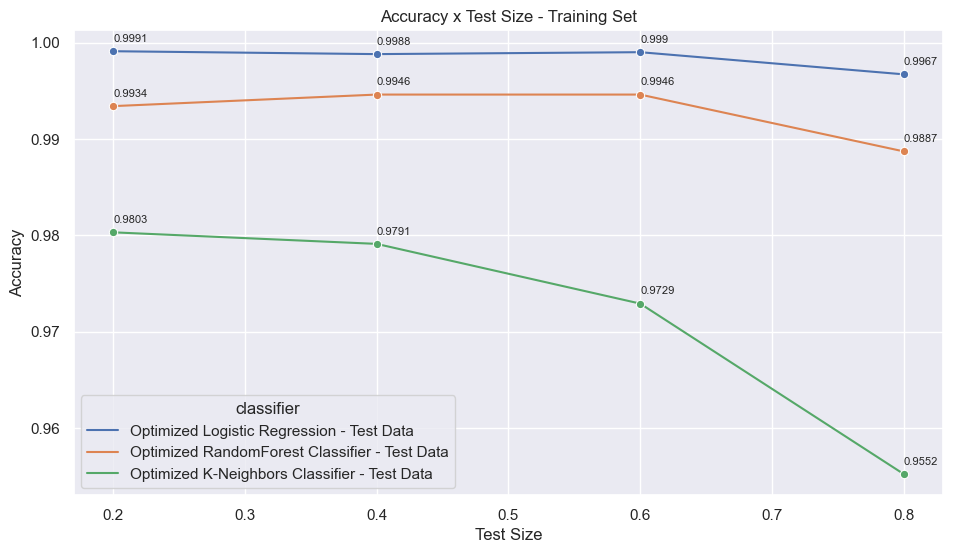

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure
plt.figure(figsize=(10, 6))
ax = plt.axes()

# Dataframe for chart
chart_df = metrics_df_superv#[0:4]

# Plot chart
ax = sns.lineplot(data=chart_df, x='test_size', y='accuracy', 
                  hue='classifier', marker='o', color='#79C')

# Annotate label points 
for x, y in zip(chart_df['test_size'], chart_df['accuracy']):    
    ax.text(x, y + 0.001, f'{y}', fontsize=8)

# Set Properties
# ax.set_xlim(-0.02, 1)
# ax.set_ylim(0.96, 0.98)
ax.set(title='Accuracy x Test Size - Training Set')
ax.set(xlabel='Test Size', ylabel='Accuracy')
plt.tight_layout(pad=2.0)
plt.show()
plt.close()
None

## 8 - Conclusion

Based on the results of this project summarized in the table below, it can be concluded that both **Non-negative Matrix Factorization (NMF) as well as the Supervised Models** used in this project are suitable classification models for the given dataset and the task at hand. While they all produced high score metric results, Logistic Regression offered the added benefit of faster computation time. This makes Logistic Regression an attractive option for similar classification tasks, especially when dealing with larger datasets or when computational resources are limited as long as labeled data is available.

**However, one of the key advantages of NMF is that it is an unsupervised learning technique, which means that it does not require labels or prior knowledge of the data.** Instead, it extracts the latent features from the data by identifying patterns and relationships among the variables. This can be particularly useful in cases where the labels are not available or are difficult to obtain. NMF can uncover hidden patterns in the data and provide insights that may not be immediately apparent.

One of the caveats to this conclusion is the fact that NMF typically requires large amounts of data to work effectively. When the dataset is small, NMF may not be able to extract the underlying structure or patterns of the data accurately. This is because NMF tries to factorize the data matrix into two non-negative matrices, which can be a difficult task when the data is sparse or there are not enough samples to learn from. Therefore, the performance of NMF can be limited when the dataset is small.

The reason for the faster computation time of Logistic Regression compared to NMF is that Logistic Regression is a simpler and more straightforward algorithm. NMF is a matrix decomposition technique that involves factorizing a data matrix into two matrices, which can be computationally expensive for large datasets. In contrast, Logistic Regression is a linear model that can be easily trained using optimization techniques. Therefore, it can be more efficient when dealing with large datasets or when the algorithm needs to be trained multiple times.

It was also observed that Bisecting KMeans performed poorly for this dataset and the task. As explained previously, one possible reason why Bisecting KMeans did not perform as well as NMF in a specific NLP task could be due to the nature of the data. In NLP, data is often high-dimensional and sparse, meaning that the number of features is large, and many of them have a value of zero for most instances.

Bisecting KMeans may struggle with high-dimensional, sparse data because it is based on the Euclidean distance between feature vectors. In such data, most points are equally far apart from each other, and it is challenging to find meaningful clusters. On the other hand, NMF is well-suited for high-dimensional, sparse data as it can reduce the dimensionality of the data by identifying the most important features.

In [52]:
# Consolidate all results in one dataframe
final_df = pd.concat([metrics_df, metrics_bkm_df, metrics_df_superv])
final_df = final_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'test_size', 'performance']]
final_df['test_size'].fillna(0.2, inplace=True)
final_df.sort_values(by=['accuracy'], ascending=False)

,accuracy,precision,recall,f1_score,roc_auc,test_size,performance
Optimized Logistic Regression - Test Data,0.9991,0.9991,0.9991,0.9991,1.0000,0.2,0.0100
Optimized Logistic Regression - Test Data,0.9990,0.9990,0.9990,0.9990,1.0000,0.6,0.0199
Optimized Logistic Regression - Test Data,0.9988,0.9988,0.9988,0.9988,1.0000,0.4,0.0150
Optimized Logistic Regression - Test Data,0.9967,0.9967,0.9967,0.9967,0.9999,0.8,0.0280
Optimized RandomForest Classifier - Test Data,0.9946,0.9946,0.9946,0.9946,0.9999,0.6,0.3889
Optimized RandomForest Classifier - Test Data,0.9946,0.9946,0.9946,0.9946,0.9999,0.4,0.2733
Optimized RandomForest Classifier - Test Data,0.9934,0.9934,0.9934,0.9934,1.0000,0.2,0.1982
Train Data - Optimized Model,0.9929,0.9930,0.9929,0.9929,0.9667,0.2,0.2844
Test_Data - Optimized Model,0.9921,0.9922,0.9921,0.9921,0.9636,0.2,0.0656
Optimized RandomForest Classifier - Test Data,0.9887,0.9887,0.9887,0.9887,0.9997,0.8,0.4368
